# **Credit Card Fraud Detection**

# **Problem Statement:**

A credit card is one of the most used financial products to make online purchases and payments. Though the Credit cards can be a convenient way to manage your finances, they can also be risky. Credit card fraud is the unauthorized use of someone else's credit card or credit card information to make purchases or withdraw cash. It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

We have to build a classification model to predict whether a transaction is fraudulent or not.

In [ ]:
#Importing the libraries

import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib.pyplot import show
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as Pyplot

from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats import shapiro
import sklearn.metrics as metrics
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score,accuracy_score,roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,validation_curve, StratifiedShuffleSplit,StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.datasets import make_classification


from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn import over_sampling
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_columns', 500)

# **Exploratory data analysis (EDA)**

In [ ]:
#Reading and understanding the data

df = pd.read_csv('creditcard.csv')
df.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.287924   
4 -0.270533  0.817739  0.753074 -0.822843  0.538196  1.345852 -1.119670   

        V15       V16       V17       V18       V19       V20       V21  \
0  1.468177 -0.470401  0.207971  0.025791  0.403993  0.251412 -0.018307   
1  0.635558  0.463917 -0.114805 -0.183361 -0.145783 -0.069083 -0.225775   
2  2.345865 -2.890083  1.109969 -0.121359 -2.261857  0.524980  0.247998   
3 -0.631418 -1.059647 -0.684093  1.965775 -1.232622 -0.208038 -0.108300   
4  0.175121 -0.451449 -0.237033 -0.038195  0.803487  0.408542 -0.009431   

        V22       V23       V24       V25       V26       V27       V28  \
0  0.277838 -0.110474  0.066928  0.128539 -0.189115  0.133558 -0.021053   
1 -0.638672  0.101288 -0.339846  0.167170  0.125895 -0.008983  0.014724   
2  0.771679  0.909412 -0.689281 -0.327642 -0.139097 -0.055353 -0.059752   
3  0.005274 -0.190321 -1.175575  0.647376 -0.221929  0.062723  0.061458   
4  0.798278 -0.137458  0.141267 -0.206010  0.502292  0.219422  0.215153   

   Amount  Class  
0  149.62      0  
1    2.69      0  
2  378.66      0  
3  123.50      0  
4   69.99      0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

In [ ]:
df.describe()

Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271e+00  1.237094e+00  1.194353e+00  1.098632e+00   
min   -1.137433e+02 -2.616051e+01 -4.355724e+01 -7.321672e+01 -1.343407e+01   
25%   -6.915971e-01 -7.682956e-01 -5.540759e-01 -2.086297e-01 -6.430976e-01   
50%   -5.433583e-02 -2.741871e-01  4.010308e-02  2.235804e-02 -5.142873e-02   
75%    6.119264e-01  3.985649e-01  5.704361e-01  3.273459e-01  5.971390e-01   
max    3.480167e+01  7.330163e+01  1.205895e+02  2.000721e+01  1.559499e+01   

                V10           V11           V12           V13           V14  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   7.092545e-13  1.874948e-12  1.053347e-12  7.127611e-13 -1.474791e-13   
std    1.088850e+00  1.020713e+00  9.992014e-01  9.952742e-01  9.585956e-01   
min   -2.458826e+01 -4.797473e+00 -1.868371e+01 -5.791881e+00 -1.921433e+01   
25%   -5.354257e-01 -7.624942e-01 -4.055715e-01 -6.485393e-01 -4.255740e-01   
50%   -9.291738e-02 -3.275735e-02  1.400326e-01 -1.356806e-02  5.060132e-02   
75%    4.539234e-01  7.395934e-01  6.182380e-01  6.625050e-01  4.931498e-01   
max    2.374514e+01  1.201891e+01  7.848392e+00  7.126883e+00  1.052677e+01   

                V15           V16           V17           V18           V19  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -5.231558e-13 -2.282250e-13 -6.425436e-13  4.950748e-13  7.057397e-13   
std    9.153160e-01  8.762529e-01  8.493371e-01  8.381762e-01  8.140405e-01   
min   -4.498945e+00 -1.412985e+01 -2.516280e+01 -9.498746e+00 -7.213527e+00   
25%   -5.828843e-01 -4.680368e-01 -4.837483e-01 -4.988498e-01 -4.562989e-01   
50%    4.807155e-02  6.641332e-02 -6.567575e-02 -3.636312e-03  3.734823e-03   
75%    6.488208e-01  5.232963e-01  3.996750e-01  5.008067e-01  4.589494e-01   
max    8.877742e+00  1.731511e+01  9.253526e+00  5.041069e+00  5.591971e+00   

                V20           V21           V22           V23           V24  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.766111e-12 -3.405756e-13 -5.723197e-13 -9.725856e-13  1.464150e-12   
std    7.709250e-01  7.345240e-01  7.257016e-01  6.244603e-01  6.056471e-01   
min   -5.449772e+01 -3.483038e+01 -1.093314e+01 -4.480774e+01 -2.836627e+00   
25%   -2.117214e-01 -2.283949e-01 -5.423504e-01 -1.618463e-01 -3.545861e-01   
50%   -6.248109e-02 -2.945017e-02  6.781943e-03 -1.119293e-02  4.097606e-02   
75%    1.330408e-01  1.863772e-01  5.285536e-01  1.476421e-01  4.395266e-01   
max    3.942090e+01  2.720284e+01  1.050309e+01  2.252841e+01  4.584549e+00   

                V25           V26           V27           V28         Amount  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  284807.000000   
mean  -6.987102e-13 -5.617874e-13  3.332082e-12 -3.518874e-12      88.349619   
std    5.212781e-01  4.822270e-01  4.036325e-01  3.300833e-01     250.120109   
min   -1.029540e+01 -2.604551e+00 -2.256568e+01 -1.543008e+01       0.000000   
25%   -3.171451e-01 -3.269839e-01 -7.083953e-02

# **Handling missing values**

In [ ]:
# Cheking percent of missing values in columns

df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

null
Time     0.0
V16      0.0
Amount   0.0
V28      0.0
V27      0.0
V26      0.0
V25      0.0
V24      0.0
V23      0.0
V22      0.0
V21      0.0
V20      0.0
V19      0.0
V18      0.0
V17      0.0
V15      0.0
V1       0.0
V14      0.0
V13      0.0
V12      0.0
V11      0.0
V10      0.0
V9       0.0
V8       0.0
V7       0.0
V6       0.0
V5       0.0
V4       0.0
V3       0.0
V2       0.0
Class    0.0

In [ ]:
#data types of the features
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
# Finding the initial full correlation in the dataset:

# correlation matrix
cor = df.corr()
cor

Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  3.777823e-12 -2.118614e-12 -1.733159e-13   
V2     -0.010593  3.777823e-12  1.000000e+00  2.325661e-12 -2.314981e-12   
V3     -0.419618 -2.118614e-12  2.325661e-12  1.000000e+00  2.046235e-13   
V4     -0.105260 -1.733159e-13 -2.314981e-12  2.046235e-13  1.000000e+00   
V5      0.173072 -3.473231e-12 -1.831952e-12 -4.032993e-12 -2.552389e-13   
V6     -0.063016 -1.306165e-13  9.438444e-13 -1.574471e-13  1.084041e-12   
V7      0.084714 -1.116494e-13  5.403436e-12  3.405586e-12  8.135064e-13   
V8     -0.036949  2.114527e-12  2.133785e-14 -1.272385e-12  7.334818e-13   
V9     -0.008660  3.016285e-14  3.238513e-13 -6.812351e-13 -7.143069e-13   
V10     0.030617 -2.615192e-12  1.463282e-12 -1.609126e-12 -1.938143e-12   
V11    -0.247689  1.866551e-12 -8.314960e-13  8.707055e-13  1.874473e-12   
V12     0.124348 -1.238745e-12  6.139448e-13 -2.730043e-12  5.393827e-13   
V13    -0.065902  7.589589e-13 -1.181068e-12 -1.020592e-12  6.813810e-13   
V14    -0.098757 -1.871054e-13 -3.384684e-13 -5.597874e-13 -1.404120e-12   
V15    -0.183453 -3.601390e-13  2.196083e-13  6.442512e-13  1.526382e-12   
V16     0.011903 -1.142884e-12 -8.000510e-13 -8.748795e-13  3.095722e-13   
V17    -0.073297  1.671073e-12  2.028957e-12 -1.058101e-12  1.151414e-14   
V18     0.090438 -5.738830e-13 -1.916566e-14 -8.846578e-13 -1.309615e-12   
V19     0.028975 -2.770259e-12 -2.237098e-13 -1.061131e-12 -9.754131e-13   
V20    -0.050866  2.662926e-13  5.839893e-13  1.873059e-12 -2.347029e-12   
V21     0.044736 -3.276238e-12  2.280202e-12  6.736294e-13 -2.696370e-12   
V22     0.144059  2.281863e-12 -2.548560e-13 -8.909339e-13  4.347776e-13   
V23     0.051142 -2.969746e-12 -4.856120e-12  4.147209e-12 -4.160969e-12   
V24    -0.016182 -1.029876e-12  6.431308e-13  3.407636e-12 -2.368743e-12   
V25    -0.233083  1.144179e-12 -9.423730e-13  5.712956e-13  1.619944e-12   
V26    -0.041407  1.835263e-12 -4.129100e-13 -2.577274e-12 -3.043100e-13   
V27    -0.005135  7.624804e-12 -9.856545e-13 -5.041444e-12 -1.456066e-12   
V28    -0.009413 -9.769215e-13  2.525513e-12  5.189109e-12 -2.832372e-12   
Amount -0.010596 -2.277087e-01 -5.314089e-01 -2.108805e-01  9.873167e-02   
Class  -0.012323 -1.013473e-01  9.128865e-02 -1.929608e-01  1.334475e-01   

                  V5            V6            V7            V8            V9  \
Time    1.730721e-01 -6.301647e-02  8.471437e-02 -3.694943e-02 -8.660434e-03   
V1     -3.473231e-12 -1.306165e-13 -1.116494e-13  2.114527e-12  3.016285e-14   
V2     -1.831952e-12  9.438444e-13  5.403436e-12  2.133785e-14  3.238513e-13   
V3     -4.032993e-12 -1.574471e-13  3.405586e-12 -1.272385e-12 -6.812351e-13   
V4     -2.552389e-13  1.084041e-12  8.135064e-13  7.334818e-13 -7.143069e-13   
V5      1.000000e+00 -6.934789e-14  1.573956e-11 -2.038243e-12 -1.000756e-12   
V6     -6.934789e-14  1.000000e+00 -2.798968e-12 -5.446480e-13  2.036743e-12   
V7      1.573956e-11 -2.798968e-12  1.000000e+00  5.528803e-12  5.088082e-13   
V8     -2.038243e-12 -5.446480e-13  5.528803e-12  1.000000e+00 -2.243172e-12   
V9     -1.000756e-12  2.036743e-12  5.088082e-13 -2.243172e-12  1.000000e+00   
V10    -7.200329e-13  7.429770e-13  1.674650e-12 -1.660630e-12  1.185391e-12   
V11    -5.928181e-13  1.014893e-12 -8.525291e-13  1.296877e-12 -3.970652e-13   
V12     1.812994e-12 -9.265590e-13 -2.826770e-13 -3.860109e-13 -1.904908e-12   
V13    -7.021996e-14  1.484679e-12 -8.171731e-13  7.722897e-13  8.754859e-13   
V14    -1.113015e-13 -1.212766e-12  2.038217e-12 -2.596182e-12 -1.271311e-12   
V15    -1.593594e-12 -1.053548e-12  1.074440e-12  1.648898e-12  8.628709e-13   
V16    -1.619090e-14  1.374197e-12 -1.478776e-12 -1.830899e-12  1.239835e-12   
V17     1.713794e-13  7.431528e-13 -1.231314e-12  7.025405e-13 -1.450585e-12   
V18     1.101433e-12  6.859871e-13 -4.281952e-13  1.499555e

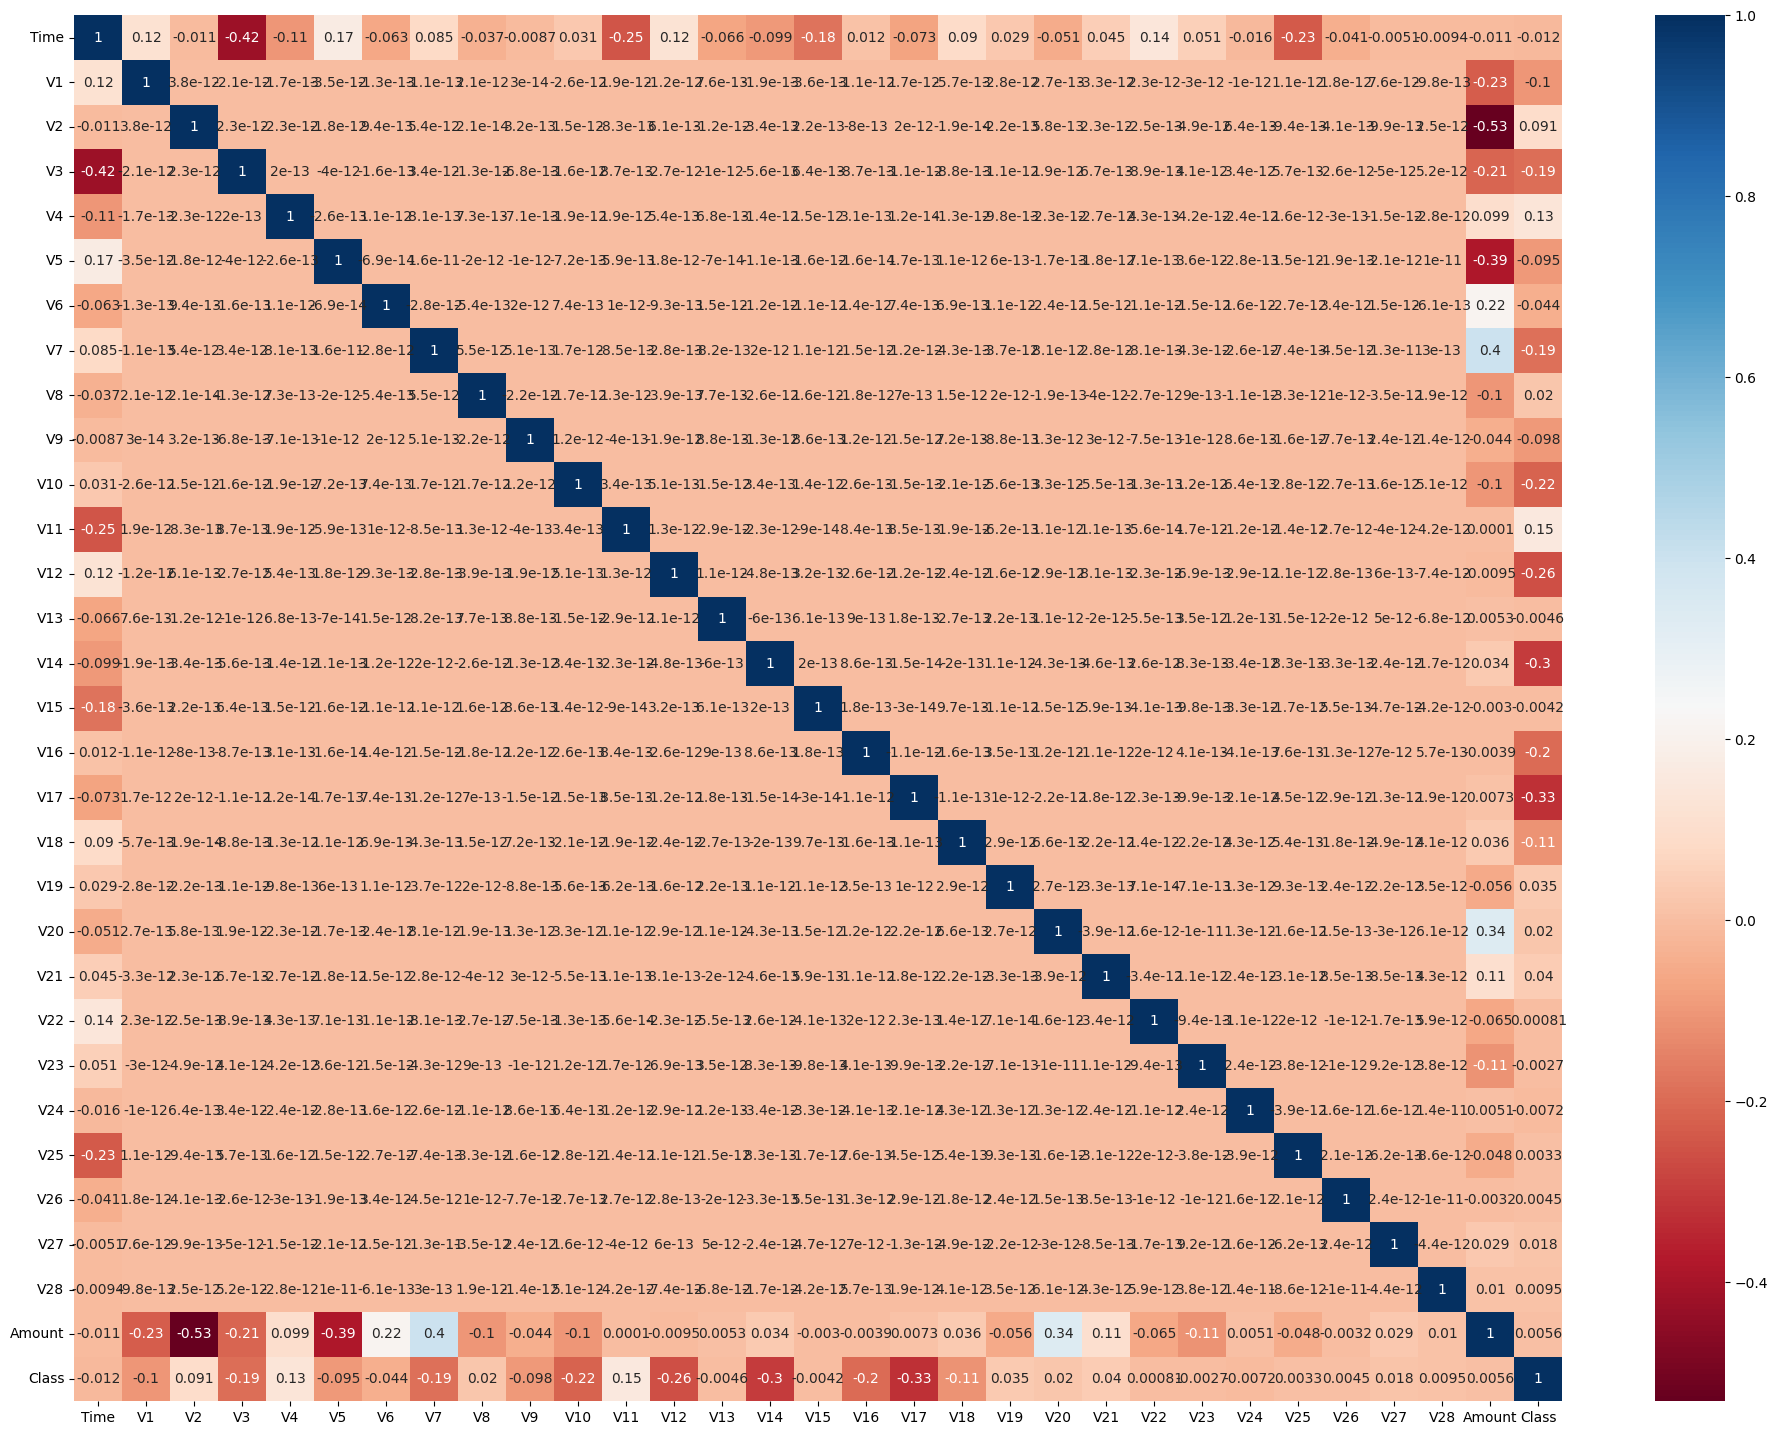

In [ ]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(24,18))

# heatmap
sns.heatmap(cor, cmap="RdBu", annot=True)
plt.show()

# **Checking the distribution of the classes**

In [ ]:
classes = df['Class'].value_counts()
classes

Class
0    284315
1       492
Name: count, dtype: int64

In [ ]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [ ]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17

We can see that there is only 0.17% frauds. We will take care of the class imbalance later.

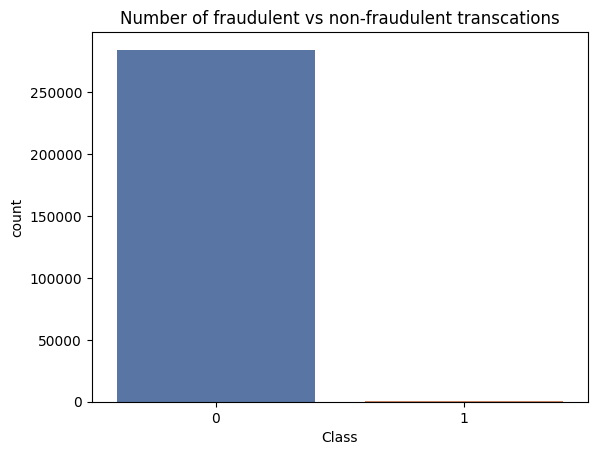

In [ ]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations

sns.countplot(x='Class', data=df, palette='deep')
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

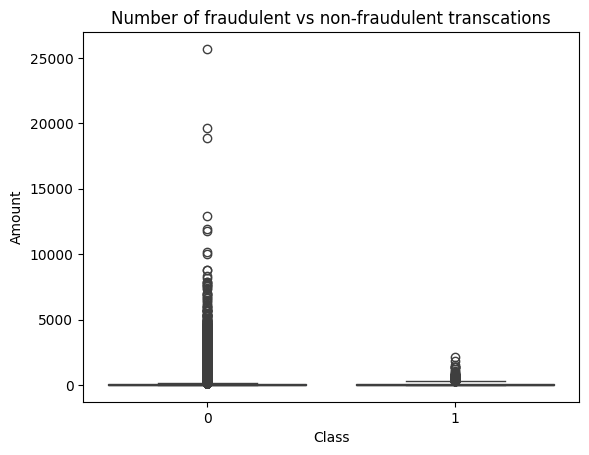

In [ ]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.xlabel('Class')
plt.ylabel('Amount')
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

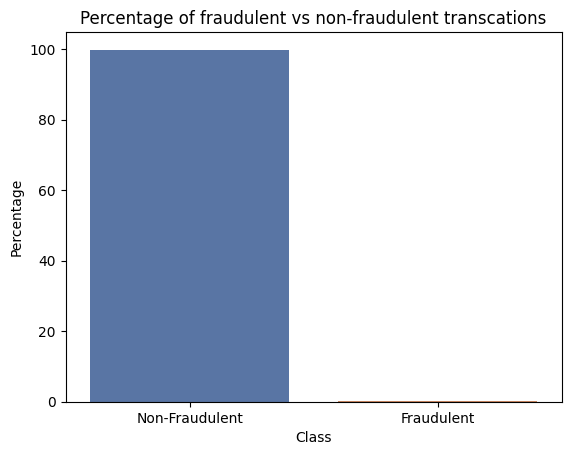

In [ ]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations

fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage , palette='deep')
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

# **Outliers treatment**

We are not performing any outliers treatment for this particular dataset. Because all the columns are already PCA transformed, which assumed that the outlier values are taken care while transforming the data.

# **Observe the distribution of classes with time**

In [ ]:
# Creating fraudulent dataframe

data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

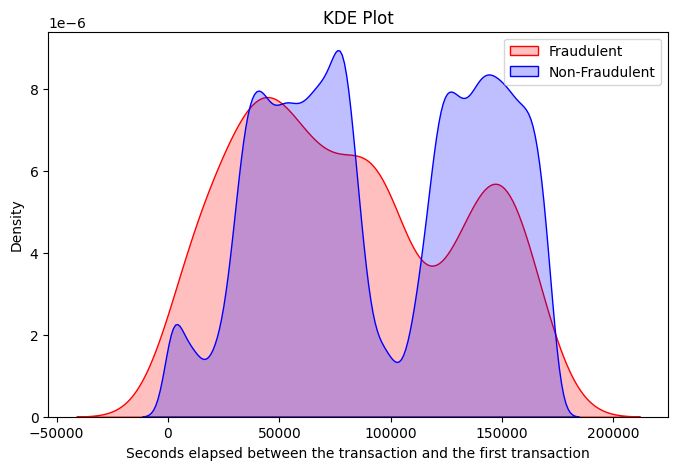

In [ ]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data_fraud['Time'], label='Fraudulent', color='red', shade=True)
sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', color='blue', shade=True)
plt.xlabel('Seconds elapsed between the transaction and the first transaction')
plt.legend()
plt.title('KDE Plot')
plt.show()

# **Analysis**

We do not see any specific pattern for the fraudulent and non-fraudulent transctions with respect to Time. Hence, we can drop the Time column.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

# **Observe the distribution of classes with amount**

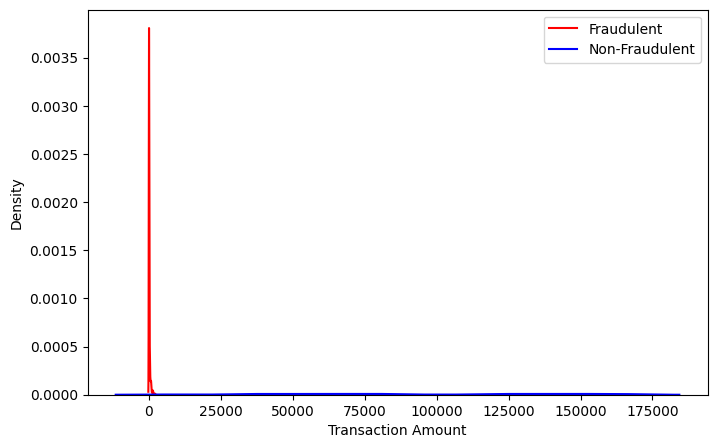

In [ ]:
plt.figure(figsize=(8, 5))
ax = sns.kdeplot(data_fraud['Amount'], label='Fraudulent', color='red', shade= False)
sns.kdeplot(data_non_fraud['Time'], label='Non-Fraudulent', color='blue', shade=False)
ax.set(xlabel='Transaction Amount')
plt.legend()
plt.show()

# **Analysis**

We can see that the fraudulent transctions are mostly densed in the lower range of amount, whereas the non-fraudulent transctions are spreaded throughout low to high range of amount.

# **Train-Test Split**

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [ ]:
# Putting target variable to y
y = df['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# **Feature Scaling**

We need to scale only the Amount column as all other columns are already scaled by the PCA transformation.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

V1        V2        V3        V4        V5        V6        V7  \
201788  2.023734 -0.429219 -0.691061 -0.201461 -0.162486  0.283718 -0.674694   
179369 -0.145286  0.736735  0.543226  0.892662  0.350846  0.089253  0.626708   
73138  -3.015846 -1.920606  1.229574  0.721577  1.089918 -0.195727 -0.462586   
208679  1.851980 -1.007445 -1.499762 -0.220770 -0.568376 -1.232633  0.248573   
206534  2.237844 -0.551513 -1.426515 -0.924369 -0.401734 -1.438232 -0.119942   

              V8        V9       V10       V11       V12       V13       V14  \
201788  0.192230  1.124319 -0.037763  0.308648  0.875063 -0.009562  0.116038   
179369 -0.049137 -0.732566  0.297692  0.519027  0.041275 -0.690783  0.647121   
73138   0.919341 -0.612193 -0.966197  1.106534  1.026421 -0.474229  0.641488   
208679 -0.539483 -0.813368  0.785431 -0.784316  0.673626  1.428269  0.043937   
206534 -0.449263 -0.717258  0.851668 -0.497634 -0.445482  0.324575  0.125543   

             V15       V16       V17       V18       V19       V20       V21  \
201788  0.086537  0.628337 -0.997868  0.482547  0.576077 -0.171390 -0.195207   
179369  0.526333 -1.098558  0.511739  0.243984  3.349611  0.206709 -0.124288   
73138  -0.430684 -0.631257  0.634633 -0.718062 -0.039929  0.842838  0.274911   
208679 -0.309507 -1.805728 -0.012118  0.377096 -0.658353 -0.196551 -0.406722   
206534  0.266588  0.802640  0.225312 -1.865494  0.621879 -0.045417  0.050447   

             V22       V23       V24       V25       V26       V27       V28  \
201788 -0.477813  0.340513  0.059174 -0.431015 -0.297028 -0.000063 -0.046947   
179369 -0.263560 -0.110568 -0.434224 -0.509076  0.719784 -0.006357  0.146053   
73138  -0.319550  0.212891 -0.268792  0.241190  0.318445 -0.100726 -0.365257   
208679 -0.899081  0.137370  0.075894 -0.244027  0.455618 -0.094066 -0.031488   
206534  0.125601  0.215531 -0.080485 -0.063975 -0.307176 -0.042838 -0.063872   

          Amount  
201788 -0.345273  
179369 -0.206439  
73138   0.358043  
208679  0.362400  
206534 -0.316109

# **Scaling the test set**

In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

V1        V2        V3        V4        V5        V6        V7  \
49089   1.229452 -0.235478 -0.627166  0.419877  1.797014  4.069574 -0.896223   
154704  2.016893 -0.088751 -2.989257 -0.142575  2.675427  3.332289 -0.652336   
67247   0.535093 -1.469185  0.868279  0.385462 -1.439135  0.368118 -0.499370   
251657  2.128486 -0.117215 -1.513910  0.166456  0.359070 -0.540072  0.116023   
201903  0.558593  1.587908 -2.368767  5.124413  2.171788 -0.500419  1.059829   

              V8        V9       V10       V11       V12       V13       V14  \
49089   1.036103  0.745991 -0.147304 -0.850459  0.397845 -0.259849 -0.277065   
154704  0.752811  1.962566 -1.025024  1.126976 -2.418093  1.250341 -0.056209   
67247   0.303698  1.042073 -0.437209  1.145725  0.907573 -1.095634 -0.055080   
251657 -0.216140  0.680314  0.079977 -1.705327 -0.127579 -0.207945  0.307878   
201903 -0.254233 -1.959060  0.948915 -0.288169 -1.007647  0.470316 -2.771902   

             V15       V16       V17       V18       V19       V20       V21  \
49089  -0.766810 -0.200946 -0.338122  0.006032  0.477431 -0.057922 -0.170060   
154704 -0.736695  0.014783  1.890249  0.333755 -0.450398 -0.147619 -0.184153   
67247  -0.621880 -0.191066  0.311988 -0.478635  0.231159  0.437685  0.028010   
251657  0.213491  0.163032 -0.587029 -0.561292  0.472667 -0.227278 -0.357993   
201903  0.221958  0.354333  2.603189  1.092576  0.668084  0.249457 -0.035049   

             V22       V23       V24       V25       V26       V27       V28  \
49089  -0.288750 -0.130270  1.025935  0.847990 -0.271476  0.060052  0.018104   
154704 -0.089661  0.087188  0.570679  0.101899  0.620842 -0.048958 -0.042831   
67247  -0.384708 -0.128376  0.286638 -0.136700  0.913904 -0.083364  0.052485   
251657 -0.905085  0.223474 -1.075605 -0.188519  0.267672 -0.071733 -0.072238   
201903  0.271455  0.381606  0.332001 -0.334757  0.448890  0.168585  0.004955   

          Amount  
49089  -0.340485  
154704 -0.320859  
67247   0.853442  
251657 -0.344410  
201903 -0.229480

# **Checking the Skewness**

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

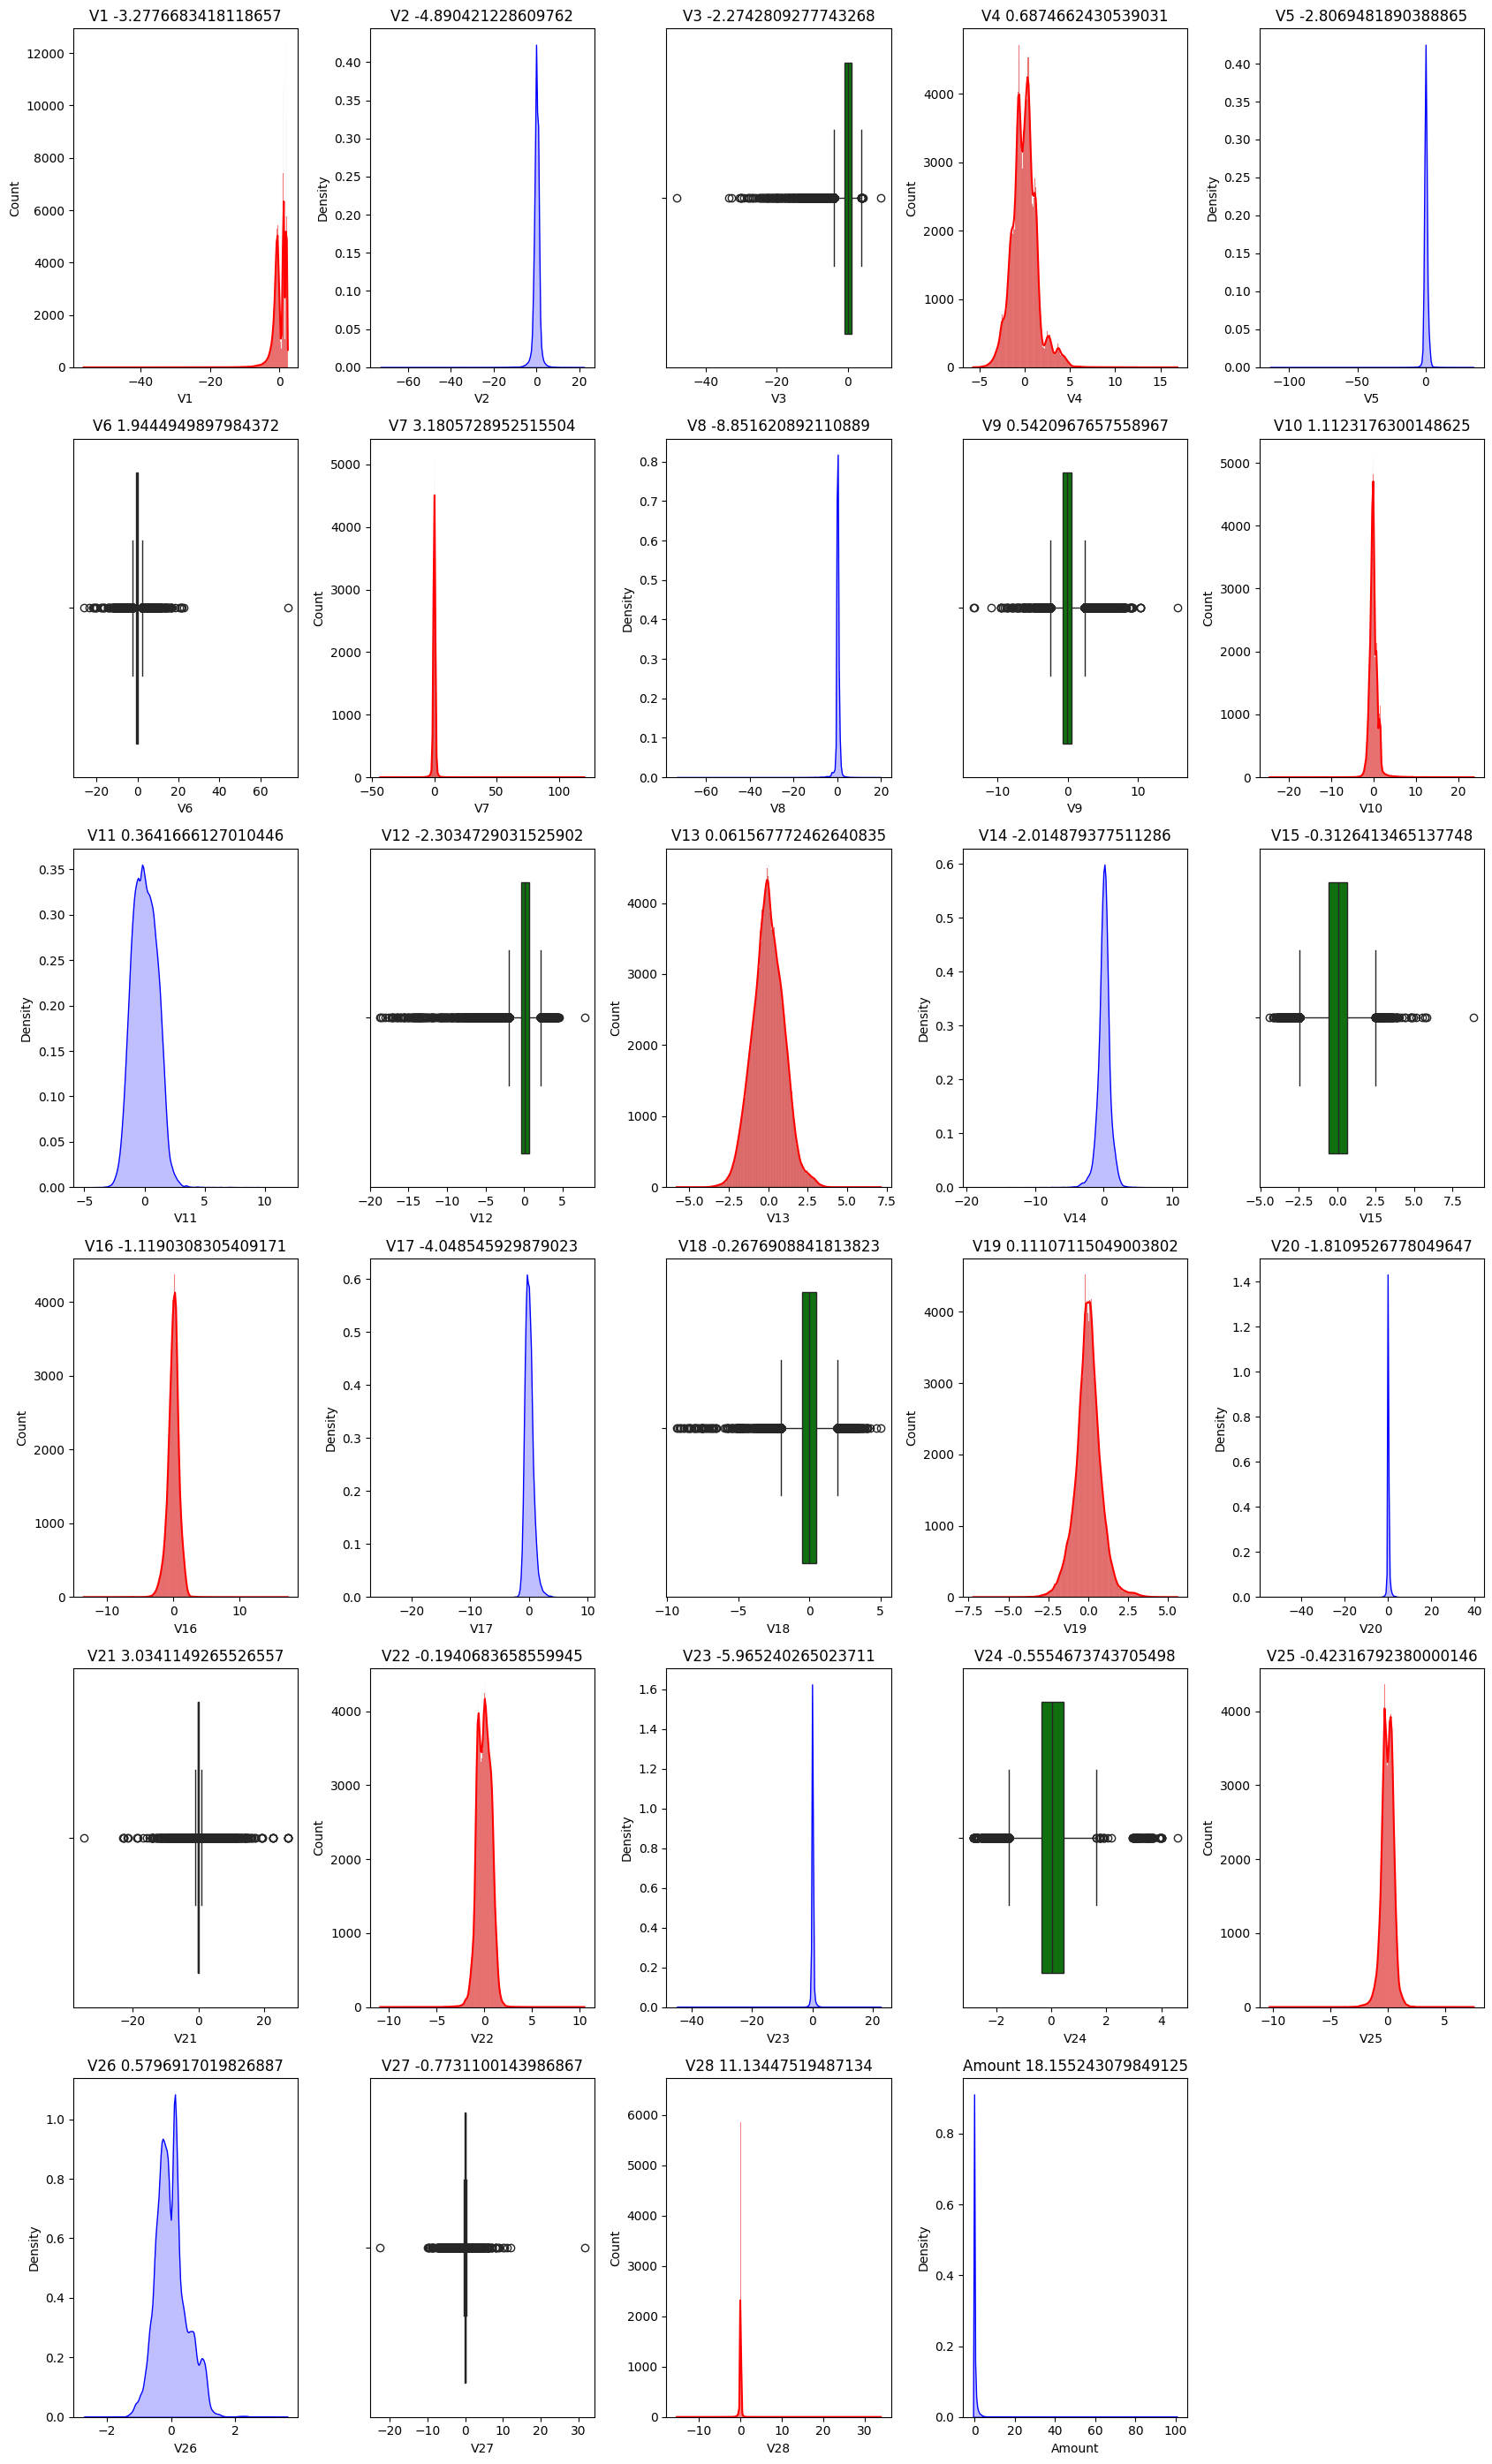

In [ ]:
# Subplots Showing Distribution and Skewness of Variables Using Different Plot Types
k = 0
plt.figure(figsize=(17, 28))
for col in cols:
    k += 1
    plt.subplot(6, 5, k)
    if k % 3 == 0:
        sns.boxplot(x=X_train[col], color = 'green')
    elif k % 3 == 1:
        sns.histplot(X_train[col], kde=True , color = 'red')
    else:
        sns.kdeplot(X_train[col], shade=True , color = 'blue')
    plt.title(col + ' ' + str(X_train[col].skew()))
plt.tight_layout()
plt.show()

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

# **Mitigate skweness with PowerTransformer**

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)
# Transform the test set
X_test[cols] = pt.transform(X_test)

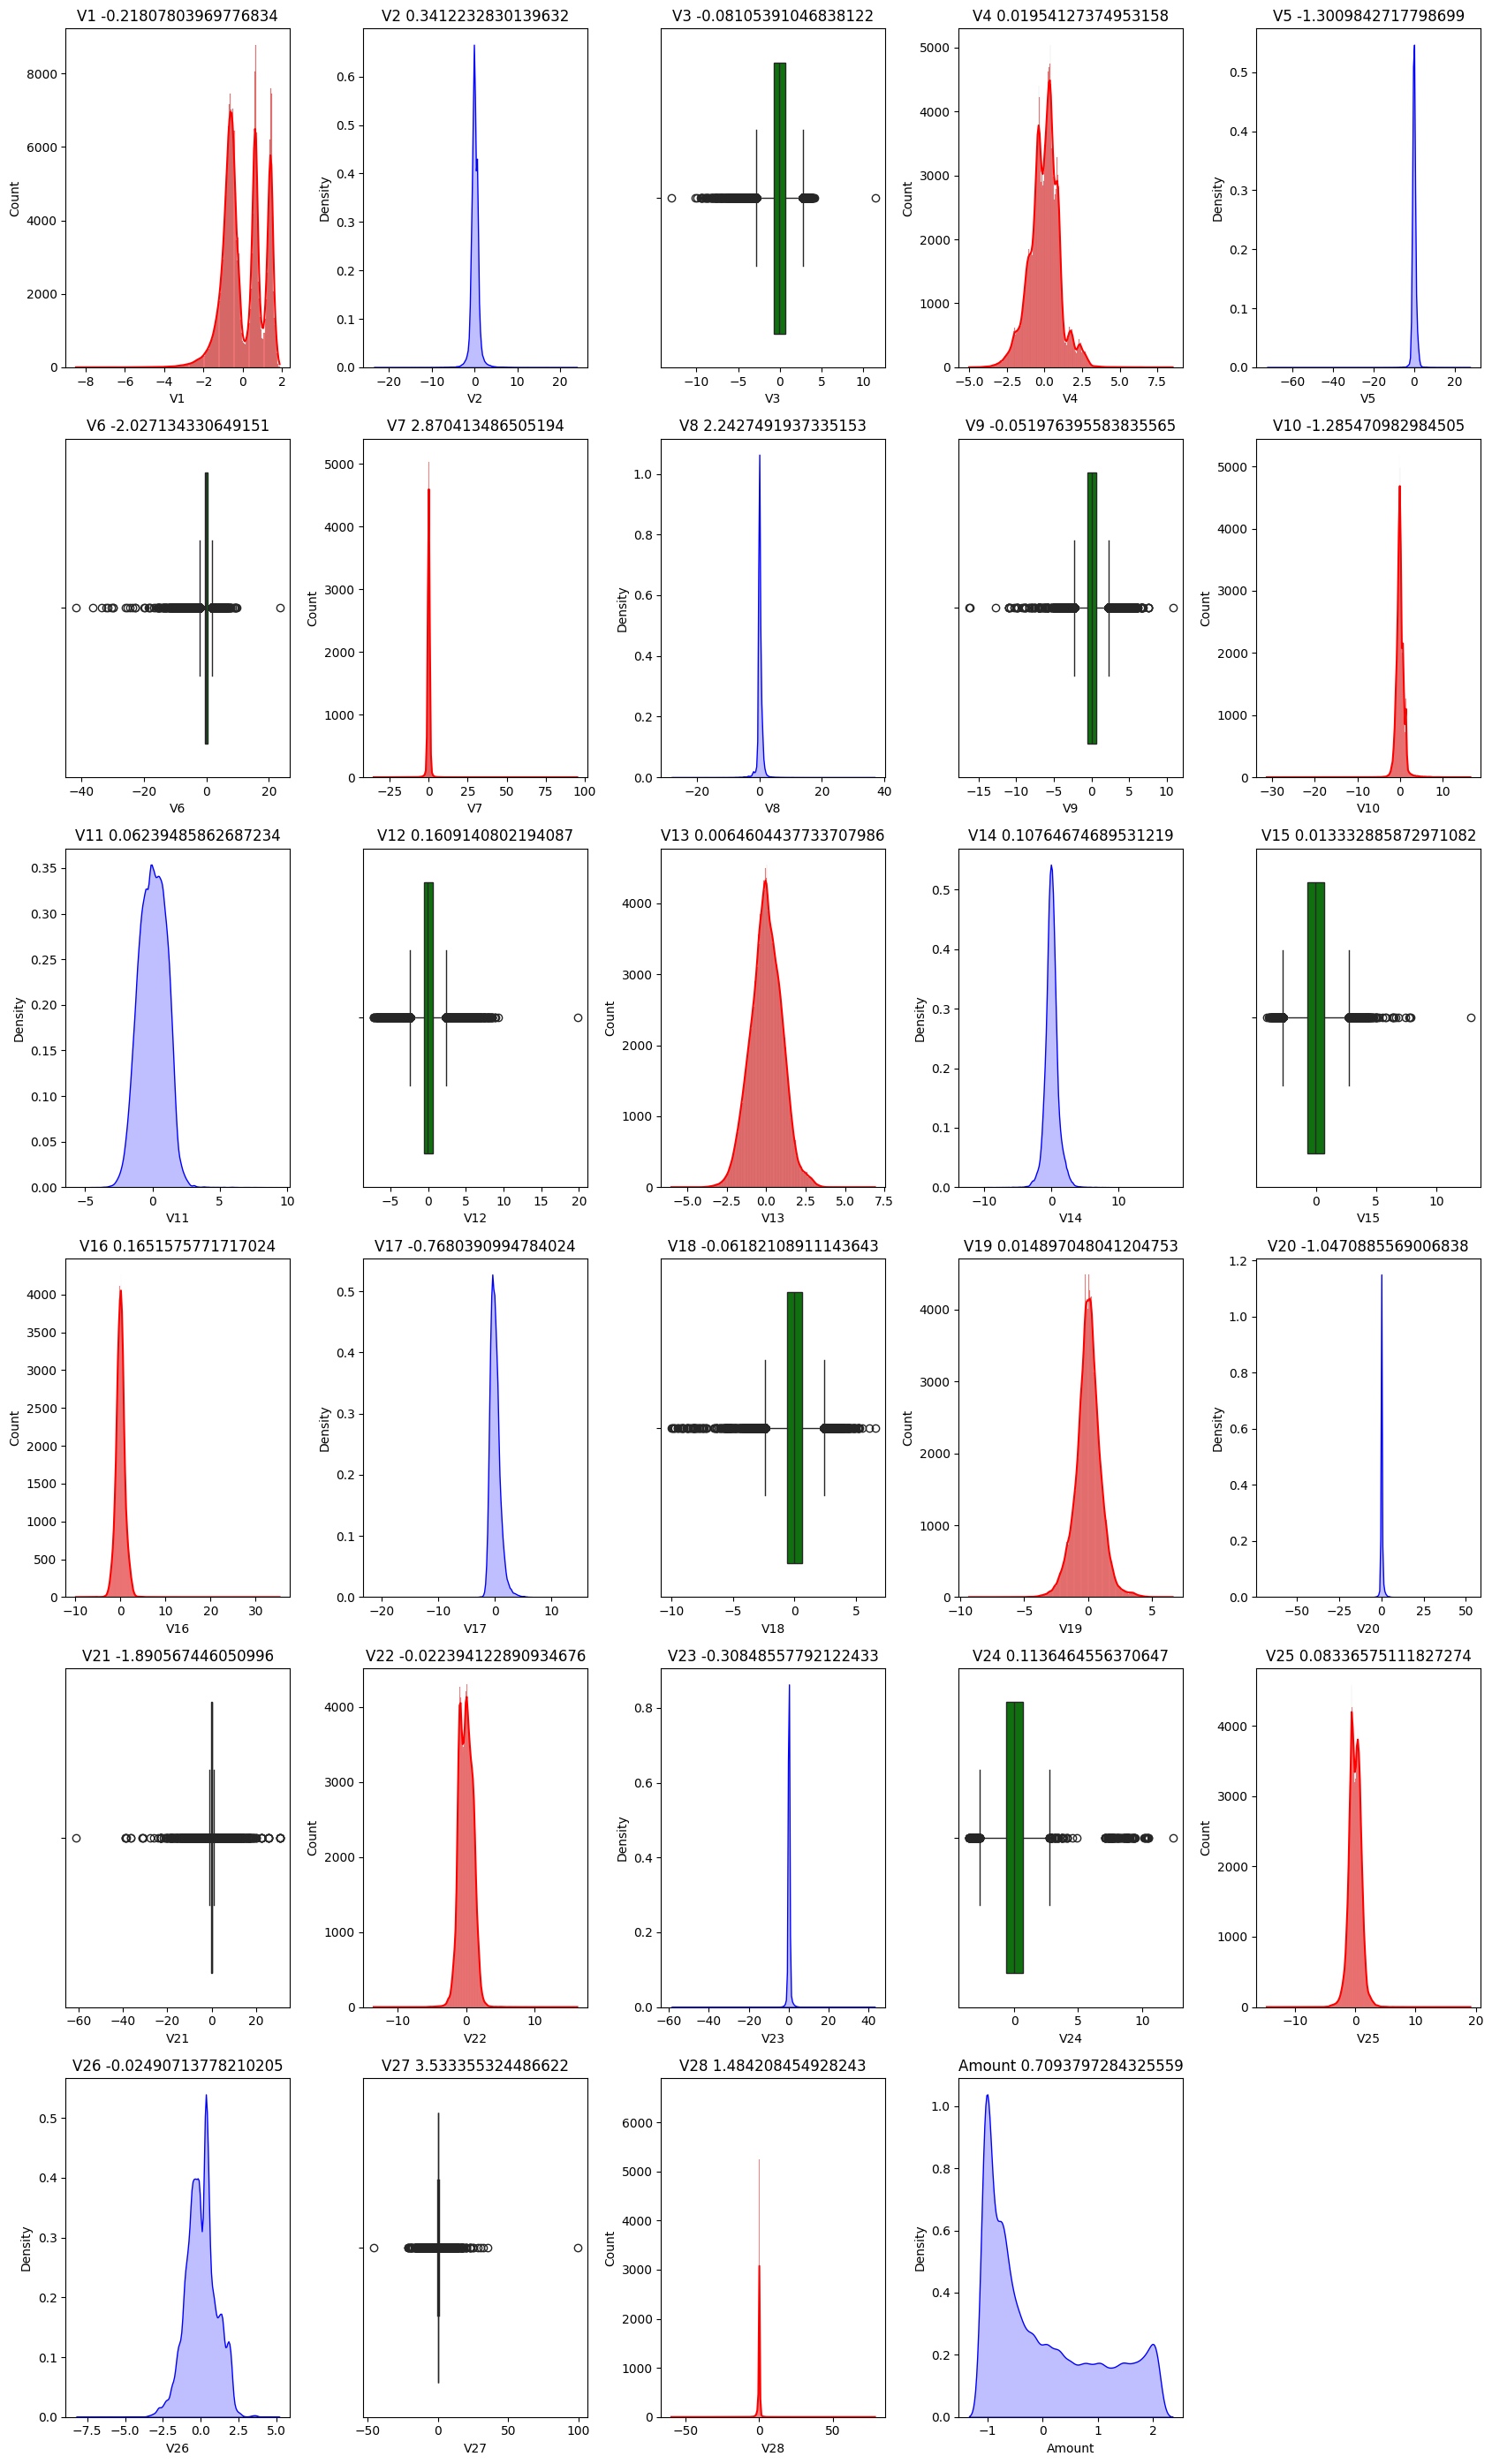

In [ ]:
#Subplots Showing Distribution and Skewness of Variables Using Different Plot Types
k = 0
plt.figure(figsize=(17, 28))
for col in cols:
    k += 1
    plt.subplot(6, 5, k)
    if k % 3 == 0:
        sns.boxplot(x=X_train[col] , color = 'green')
    elif k % 3 == 1:
        sns.histplot(X_train[col], kde=True , color = 'red')
    else:
        sns.kdeplot(X_train[col], shade=True, color ='blue')
    plt.title(col + ' ' + str(X_train[col].skew()))
plt.tight_layout()
plt.show()

Now we can see that all the variables are normally distributed after the transformation.

# **Model building on imbalanced data**

# **Logistic regression**

In [ ]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# **Tuning hyperparameter C**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       1.429071      0.734436         0.052730        0.026412    0.01   
1       1.512605      0.287728         0.036699        0.003282     0.1   
2       1.771256      0.493770         0.052139        0.021081       1   
3       1.643340      0.454298         0.036556        0.002180      10   
4       1.781438      0.268653         0.044344        0.014378     100   
5       1.886465      0.539958         0.040409        0.008003    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.986856           0.987234           0.968390   
1   {'C': 0.1}           0.986104           0.987144           0.960929   
2     {'C': 1}           0.985834           0.986806           0.958452   
3    {'C': 10}           0.985798           0.986754           0.958181   
4   {'C': 100}           0.985793           0.986748           0.958155   
5  {'C': 1000}           0.985793           0.986747           0.958153   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.982373           0.993743         0.983719        0.008479   
1           0.980620           0.992284         0.981416        0.010893   
2           0.979781           0.991548         0.980484        0.011635   
3           0.979674           0.991467         0.980375        0.011715   
4           0.979666           0.991461         0.980365        0.011722   
5           0.979663           0.991461         0.980363        0.011723   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.984043            0.984587   
1                2            0.982402            0.983785   
2                3            0.981722            0.983322   
3                4            0.981632            0.983262   
4                5            0.981625            0.983256   
5                6            0.981623            0.983256   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988474            0.985596            0.983075   
1            0.987917            0.984018            0.981187   
2            0.987492            0.983305            0.980489   
3            0.987435            0.983216            0.980404   
4            0.987429            0.983207            0.980396   
5            0.987428            0.983206            0.980395   

   mean_train_score  std_train_score  
0          0.985155         0.001849  
1          0.983862         0.002270  
2          0.983266         0.002365  
3          0.983190         0.002375  
4          0.983182         0.002376  
5          0.983182         0.002376

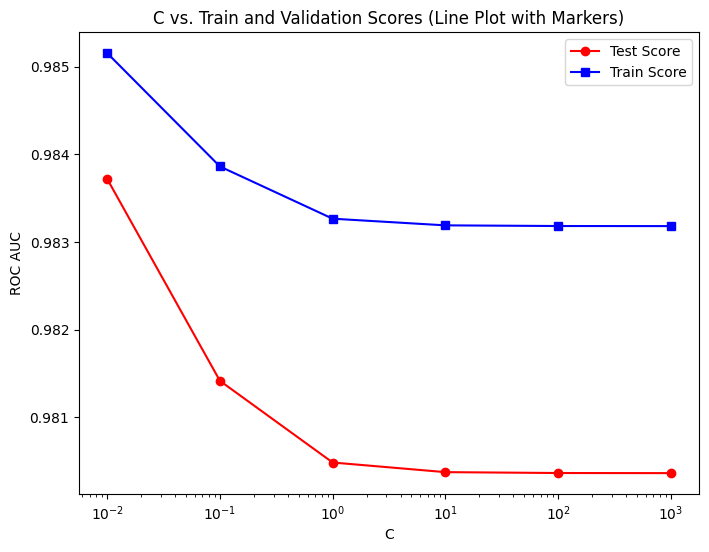

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], marker='o', label='Test Score', color = 'red')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], marker='s', label='Train Score', color = 'blue')
plt.xlabel('C')
plt.ylabel('ROC AUC')
plt.legend(loc='upper right')
plt.xscale('log')
plt.title('C vs. Train and Validation Scores (Line Plot with Markers)')
plt.show()

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


# **Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

# **Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

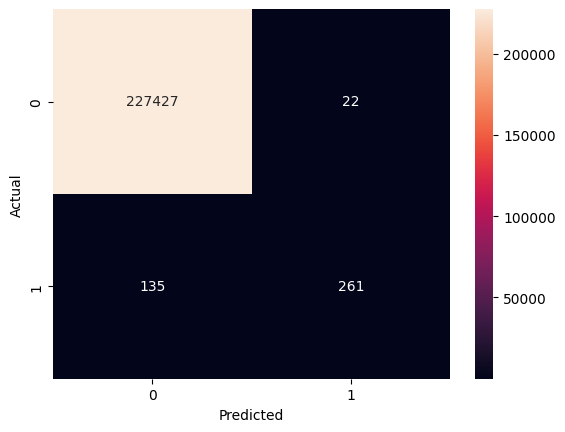

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



# **ROC on the train set**

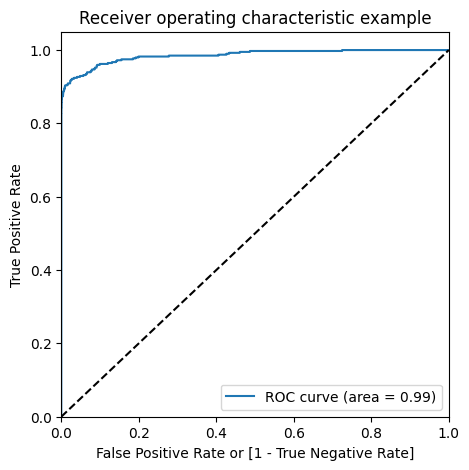

In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:, 1]

# Plot the ROC curve with different line styles
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

# **Prediction on the test set**

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

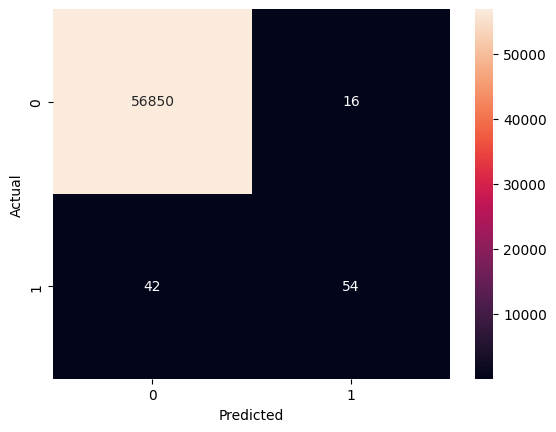

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)

sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



# **ROC on the test set**

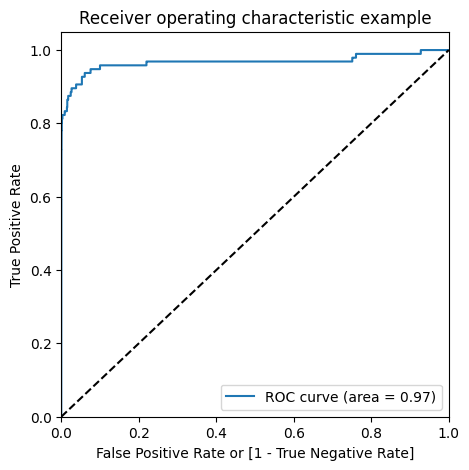

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train test**

Accuracy= 0.99,
Sensitivity= 0.65,
Specificity= 0.99,
F1-Score= 0.76,
ROC= 0.99.


**Test set**

Accuracy = 0.99,
Sensitivity = 0.56,
Specificity = 0.99,
F1-Score = 0.65,
ROC = 0.97.


Overall, the model is performing well in the test set, what it had learnt from the train set.

# **Decision Tree**

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       5.090193      0.782084         0.036242        0.000754   
1       5.144302      0.369951         0.039556        0.010352   
2       5.085973      0.395861         0.038186        0.010242   
3       5.178199      0.622890         0.038854        0.011644   
4       9.785916      0.480412         0.033829        0.000189   
5       9.781229      0.580437         0.033528        0.000873   
6       9.708019      0.524898         0.042156        0.003262   
7       9.859442      0.346946         0.044218        0.009313   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.933337   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933297   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.933279   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.924926   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.932318   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933458   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.933453   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.933180           0.923878         0.930132        0.004423   
1           0.933180           0.923869         0.930129        0.004427   
2           0.936720           0.944598         0.938205        0.004732   
3           0.936720           0.944598         0.938199        0.004738   
4           0.923873           0.930483         0.926427        0.002900   
5           0.916472           0.930467         0.926419        0.007074   
6           0.919691           0.944083         0.932411        0.009986   
7           0.919649           0.944104         0.932402        0.010011   

   rank_test_score  
0                5  
1                6  
2                1  
3                2  
4                7  
5                8  
6                3  
7                4

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

# **Prediction on the train set**

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

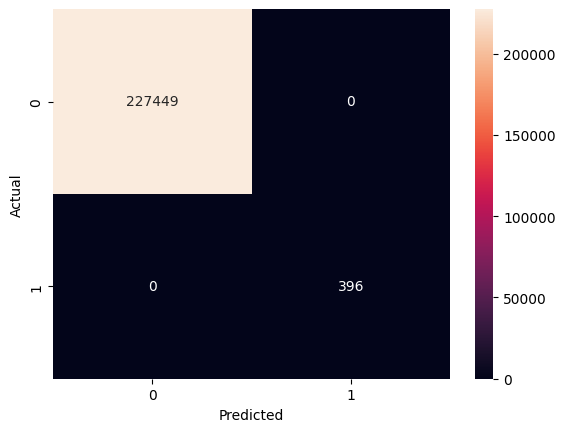

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

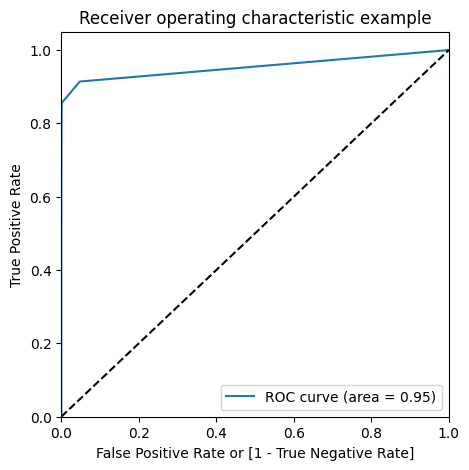

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

# **Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

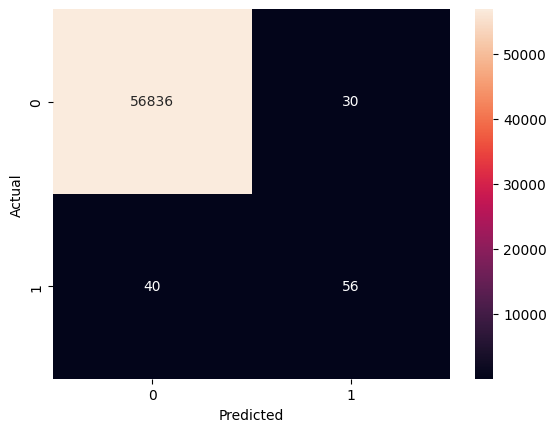

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

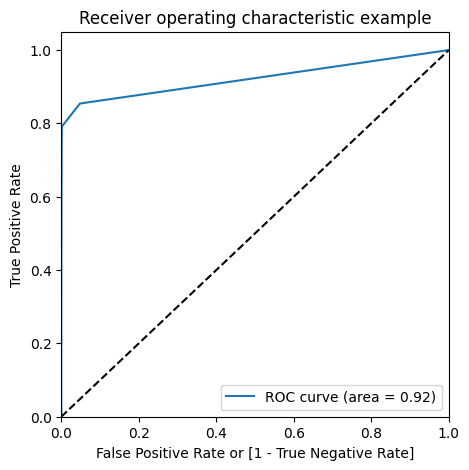

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.99,
Sensitivity = 1.0,
Specificity = 1.0,
F1-Score = 0.74,
ROC-AUC = 0.95.

**Test set**

Accuracy = 0.99,
Sensitivity = 0.58,
Specificity = 0.99,
F-1 Score = 0.74,
ROC-AUC = 0.92.


# **XGBoost**

In [ ]:
!pip install xgboost

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       4.734400      1.022349         0.173441        0.031534   
1       4.518520      0.686860         0.192463        0.063312   
2       4.937687      1.345983         0.146815        0.003204   
3       5.107658      1.832335         0.149393        0.005880   
4       4.527152      0.560467         0.195897        0.076452   
5       4.758653      1.537984         0.146022        0.006479   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975585   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.972484   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.974963   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.955029   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.974179   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.968630   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.974595           0.980946         0.977042        0.002790   
1           0.976596           0.978129         0.975736        0.002383   
2           0.972600           0.979148         0.975570        0.002707   
3           0.953863           0.971355         0.960083        0.007985   
4           0.970199           0.974645         0.973008        0.001995   
5           0.972430           0.975082         0.972047        0.002648   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.999865            0.999600   
1                2            0.999963            0.999952   
2                3            0.999963            0.999971   
3                6            0.999998            0.999997   
4                4            1.000000            1.000000   
5                5            1.000000            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            0.999272          0.999579         0.000243  
1            0.999955          0.999957         0.000005  
2            0.999945          0.999960         0.000011  
3            0.999995          0.999997         0.000001  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

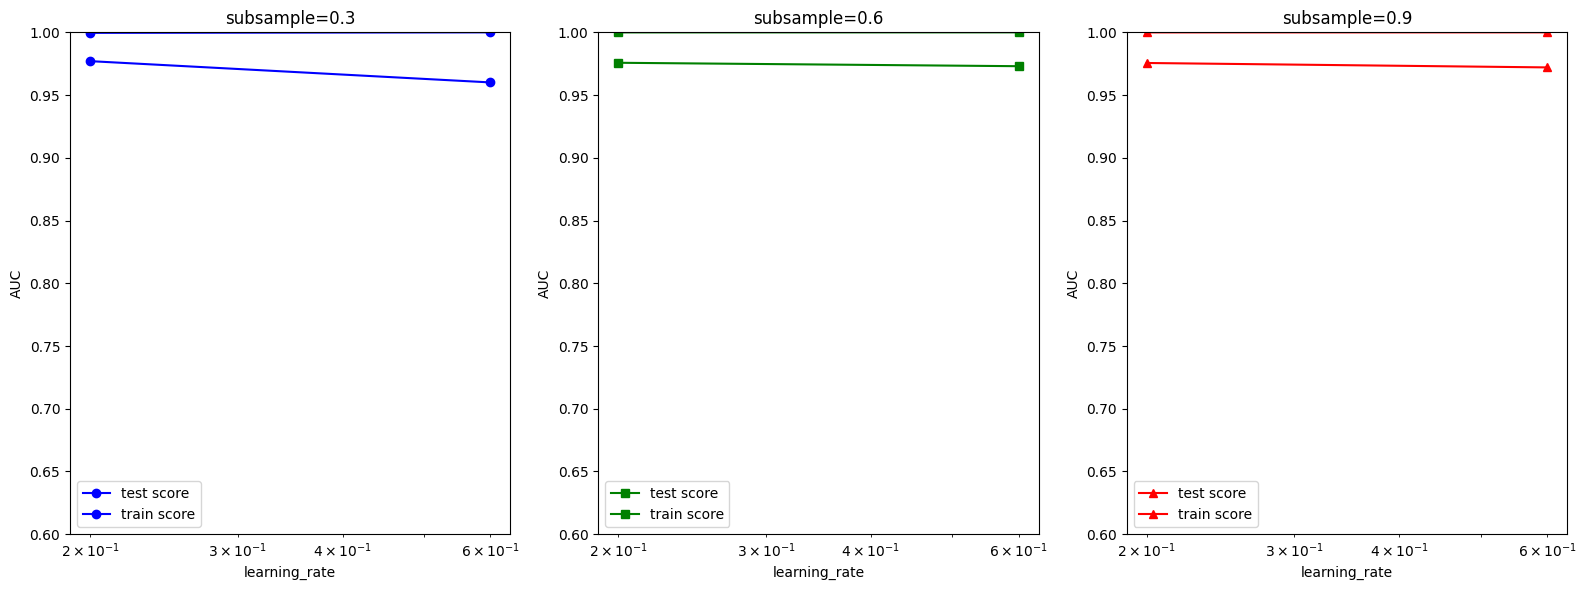

In [ ]:
plt.figure(figsize=(16, 6))

param_grid = {'learning_rate': [0.2, 0.6],
              'subsample': [0.3, 0.6, 0.9]}

colors = ['b', 'g', 'r']
markers = ['o', 's', '^']

for n, subsample in enumerate(param_grid['subsample']):

    # subplot 1/n
    plt.subplot(1, len(param_grid['subsample']), n + 1)
    df = cv_results[cv_results['param_subsample'] == subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"], color=colors[n], marker=markers[n])
    plt.plot(df["param_learning_rate"], df["mean_train_score"], color=colors[n], marker=markers[n])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower left')
    plt.xscale('log')

plt.tight_layout()
plt.show()


# **Model with optimal hyperparameters**


In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

# **Prediction on the train set**

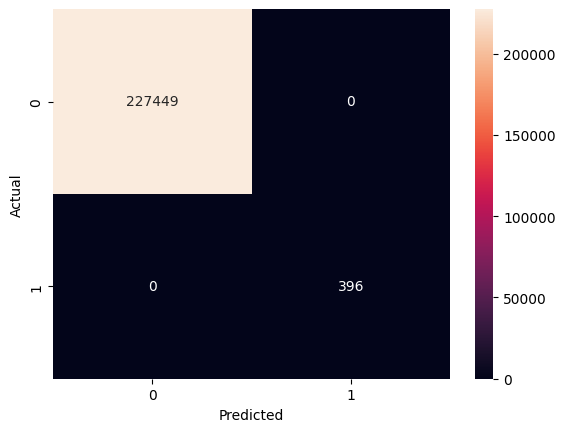

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00       396

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

1.0

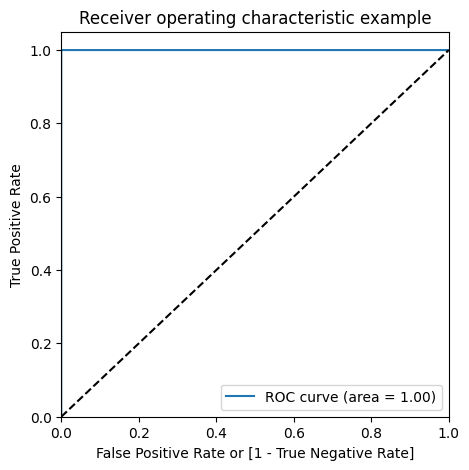

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

# **Prediction on the test set**

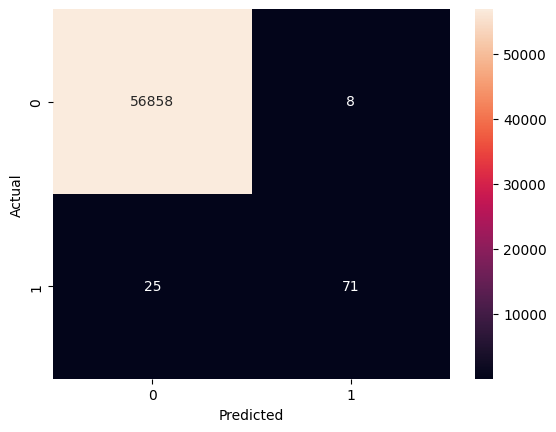

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7395833333333334
Specificity:- 0.9998593183976365
F1-Score:- 0.8114285714285714


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.90      0.74      0.81        96

    accuracy                           1.00     56962
   macro avg       0.95      0.87      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9723599118981465

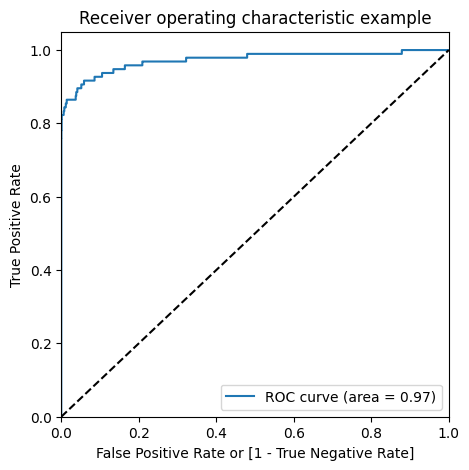

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy:- 1.0,
Sensitivity:- 1.0,
Specificity:- 1.0,
ROC-AUC = 1.0,
F1-Score:- 1.0.

**Test set**

Accuracy = 0.99,
Sensitivity = 0.73,
Specificity = 0.99,
ROC-AUC = 0.97,
F1-Score = 0.81.


Overall, the model is performing well in the test set, what it had learnt from the train set.

# **Choosing best model on the imbalanced data** (Logistic, XGBoost and Decision Tree)

But as we have to choose one of them, we can go for the best as XGBoost, which gives us ROC score of 1.0 on the train data and 0.98 on the test data.

Keep in mind that XGBoost requires more resource utilization than Logistic model. Hence building XGBoost model is more costlier than the Logistic model. But XGBoost having ROC score 0.98, which is 0.01 more than the Logistic model. The 0.01 increase of score may convert into huge amount of saving for the bansformed

**Print the important features of the best model to understand the dataset**

This will not give much explanation on the already transformed dataset

But it will help us in understanding if the dataset is not PCA transformed.

Top var = 14
2nd Top var = 7
3rd Top var = 10


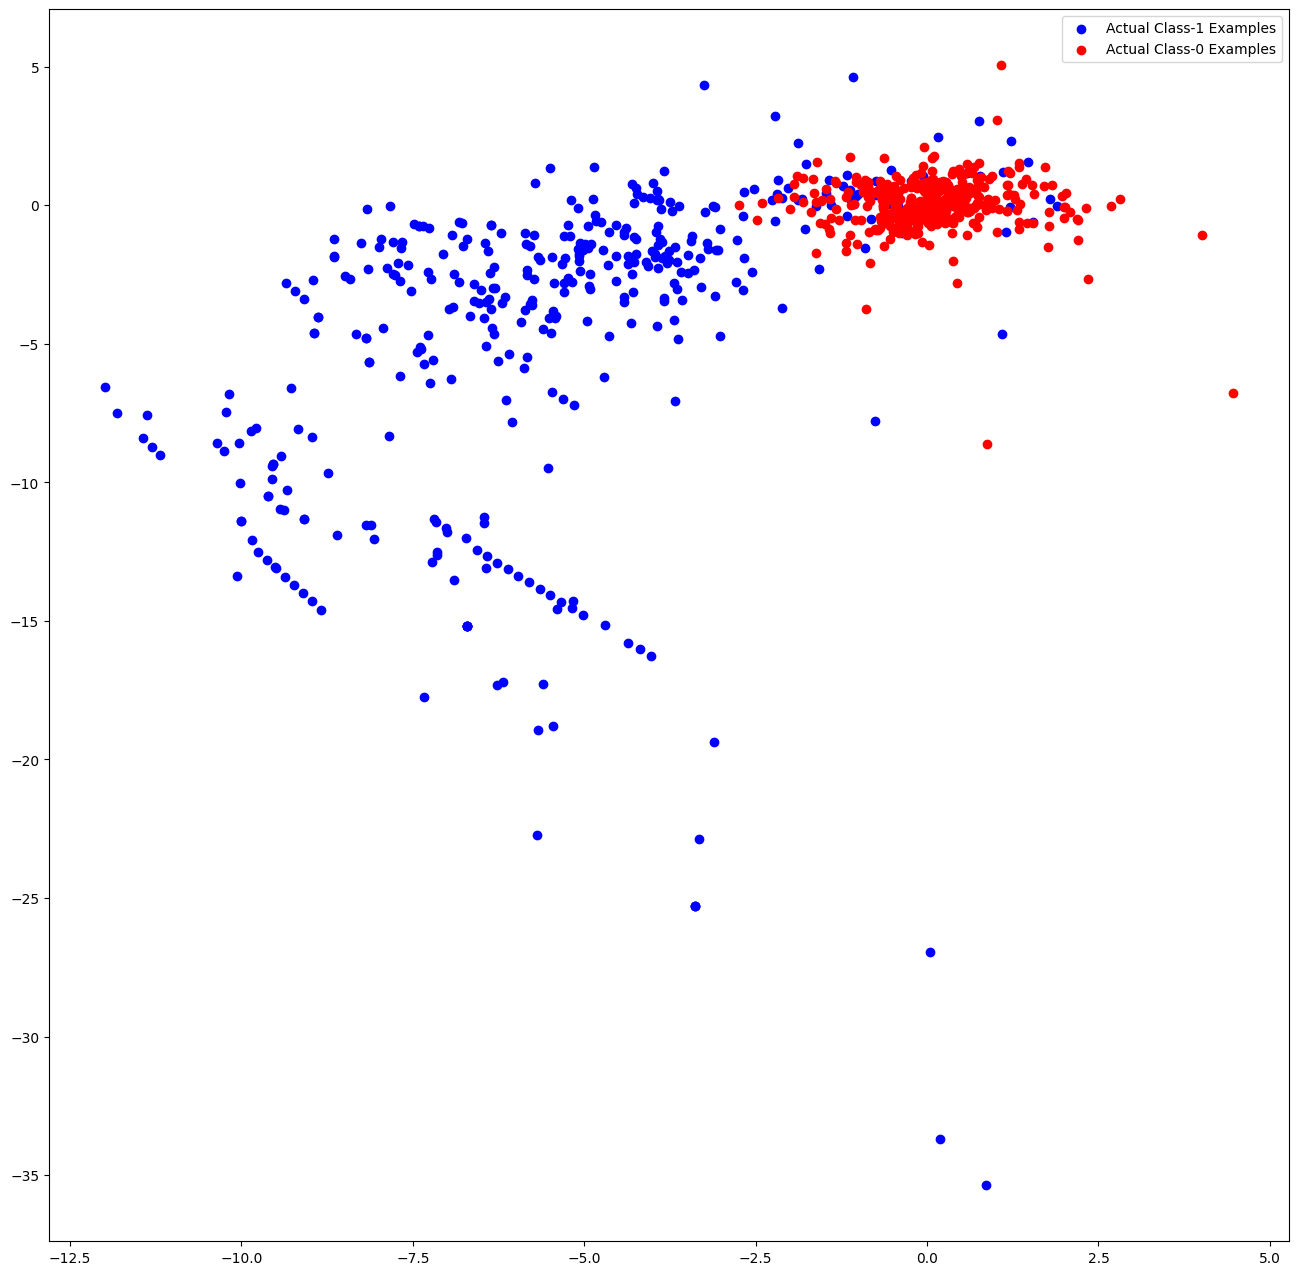

In [ ]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = [16, 16]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples', color='blue')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples', color='red')
plt.legend()

**Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.82052475


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

**Handling data imbalance**

As we see that the data is heavily imbalanced, We will try several approaches for handling data imbalance.

# **Undersampling**

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


# **Model building on balanced data with Undersampling**

# **Logistic Regression**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       0.022881      0.008355         0.009934        0.003117    0.01   
1       0.015660      0.002939         0.006538        0.000707     0.1   
2       0.017733      0.002052         0.007703        0.001828       1   
3       0.020603      0.003010         0.006705        0.001090      10   
4       0.020601      0.004274         0.006468        0.000529     100   
5       0.021589      0.004058         0.005996        0.000179    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.976630           0.994460           0.967468   
1   {'C': 0.1}           0.972019           0.993827           0.965865   
2     {'C': 1}           0.970906           0.992719           0.963301   
3    {'C': 10}           0.970111           0.992403           0.962981   
4   {'C': 100}           0.967886           0.992244           0.960737   
5  {'C': 1000}           0.967886           0.992244           0.960256   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.983165           0.978405         0.980025        0.008833   
1           0.979798           0.975504         0.977403        0.009394   
2           0.972102           0.974859         0.974778        0.009755   
3           0.970819           0.976309         0.974525        0.009892   
4           0.970819           0.976471         0.973631        0.010599   
5           0.970980           0.976148         0.973503        0.010692   

   rank_test_score  split0_train_score  split1_train_score  \
0                1            0.986429            0.983288   
1                2            0.987857            0.984586   
2                3            0.989095            0.986223   
3                4            0.990114            0.986593   
4                5            0.990184            0.986543   
5                6            0.990114            0.986543   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988635            0.984406            0.985536   
1            0.990496            0.986595            0.986063   
2            0.991193            0.988008            0.987676   
3            0.991601            0.988187            0.988532   
4            0.991760            0.988118            0.988562   
5            0.991790            0.988048            0.988562   

   mean_train_score  std_train_score  
0          0.985659         0.001825  
1          0.987120         0.001988  
2          0.988439         0.001655  
3          0.989005         0.001713  
4          0.989033         0.001790  
5          0.989011         0.001798

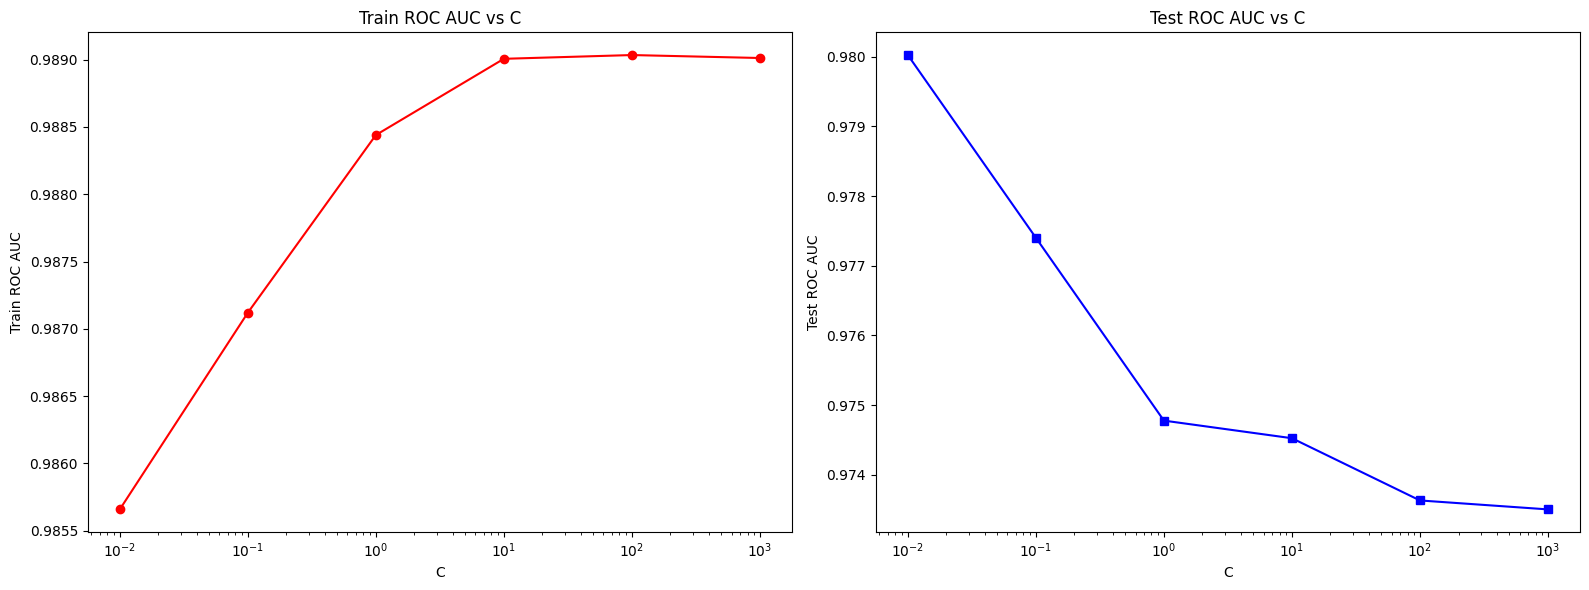

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

ax[0].plot(cv_results['param_C'], cv_results['mean_train_score'] ,  color = 'red', marker = 'o')
ax[0].set_xlabel('C')
ax[0].set_ylabel('Train ROC AUC')
ax[0].set_xscale('log')
ax[0].set_title('Train ROC AUC vs C')

ax[1].plot(cv_results['param_C'], cv_results['mean_test_score'], color = 'blue' , marker = 's')
ax[1].set_xlabel('C')
ax[1].set_ylabel('Test ROC AUC')
ax[1].set_xscale('log')
ax[1].set_title('Test ROC AUC vs C')

plt.tight_layout()
plt.show()

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9800254574716254 at C = 0.01


# **Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

# **Prediction on the train set**

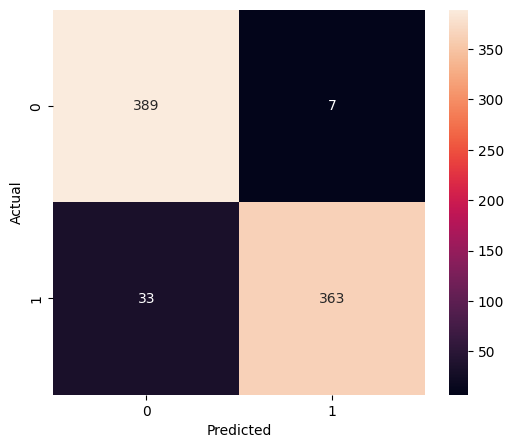

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9494949494949495
Sensitivity:- 0.9166666666666666
Specificity:- 0.9823232323232324
F1-Score:- 0.947780678851175


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       396
           1       0.98      0.92      0.95       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9864937251300888

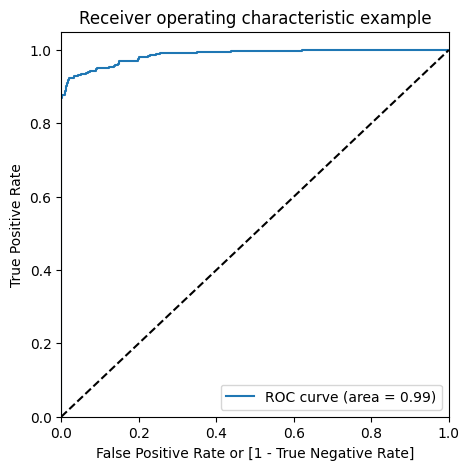

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

# **Prediction on the test set**

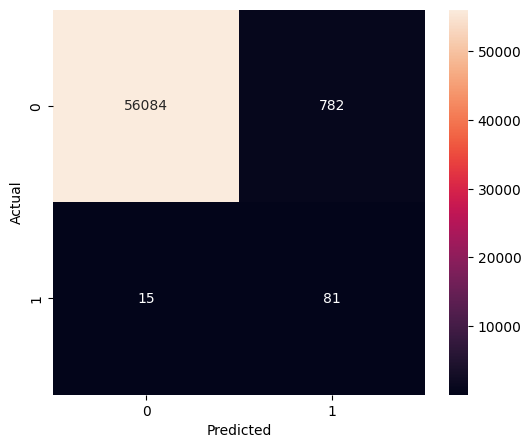

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9860082160036515
Sensitivity:- 0.84375
Specificity:- 0.9862483733689726


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.09      0.84      0.17        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.58     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9734029340906692

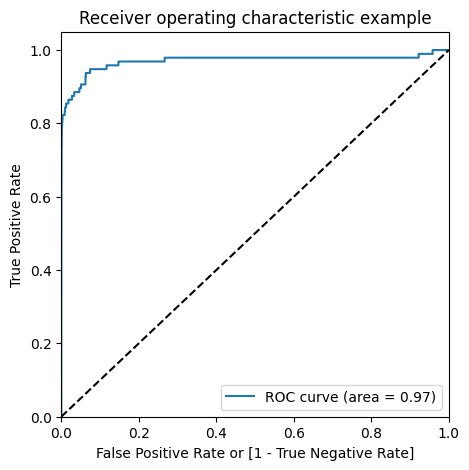

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.94, Sensitivity = 0.91, Specificity = 0.98, ROC-AUC = 0.99.

**Test set**

Accuracy = 0.98,Sensitivity = 0.84, Specificity = 0.98, ROC-AUC = 0.97.

# **XGBoost**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.530907      0.180788         0.021587        0.005817   
1       0.696320      0.389496         0.013372        0.003707   
2       0.145002      0.003169         0.010490        0.000327   
3       0.108915      0.014017         0.009950        0.000291   
4       0.105221      0.002410         0.010861        0.000977   
5       0.121320      0.014616         0.011437        0.000757   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.976641   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.970960   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.973370   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.963958   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.959366   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.971935   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.973026           0.982438         0.977368        0.003877   
1           0.971189           0.981348         0.974499        0.004844   
2           0.973313           0.980774         0.975819        0.003504   
3           0.969697           0.981061         0.971572        0.007107   
4           0.971074           0.977732         0.969391        0.007592   
5           0.971993           0.980601         0.974843        0.004072   

   rank_test_score  split0_train_score  split1_train_score  \
0                1                 1.0            0.999971   
1                4                 1.0            1.000000   
2                2                 1.0            1.000000   
3                5                 1.0            1.000000   
4                6                 1.0            1.000000   
5                3                 1.0            1.000000   

   split2_train_score  mean_train_score  std_train_score  
0            1.000000          0.999990         0.000014  
1            1.000000          1.000000         0.000000  
2            1.000000          1.000000         0.000000  
3            0.999928          0.999976         0.000034  
4            1.000000          1.000000         0.000000  
5            1.000000          1.000000         0.000000

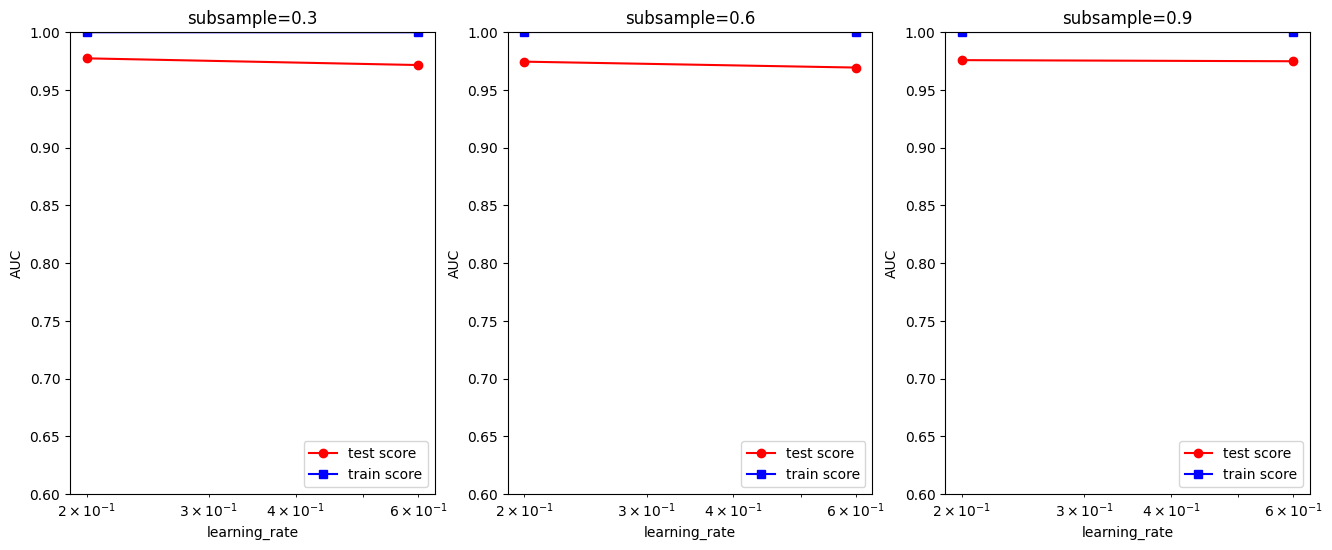

In [ ]:
#plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"], marker='o', color = 'red')
    plt.plot(df["param_learning_rate"], df["mean_train_score"], marker='s', color = 'blue')
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')

# **Model with optimal hyperparameters**

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6}, ...)

# **Prediction on the train set**

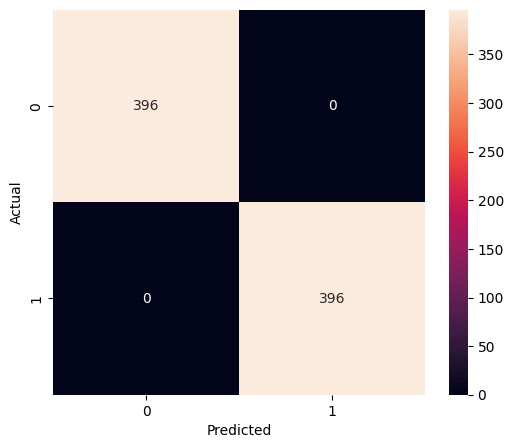

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

1.0

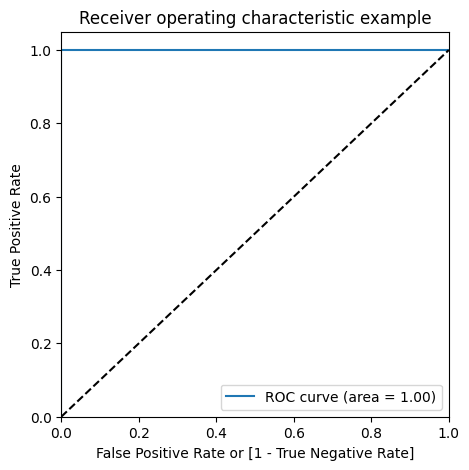

In [ ]:
#Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

# **Prediction on the test set**

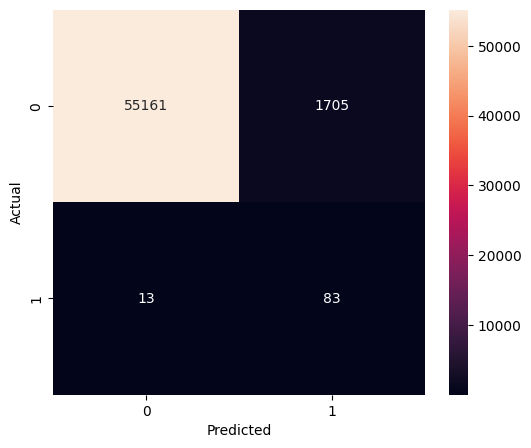

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9698395421509076
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.05      0.86      0.09        96

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9757109916294446

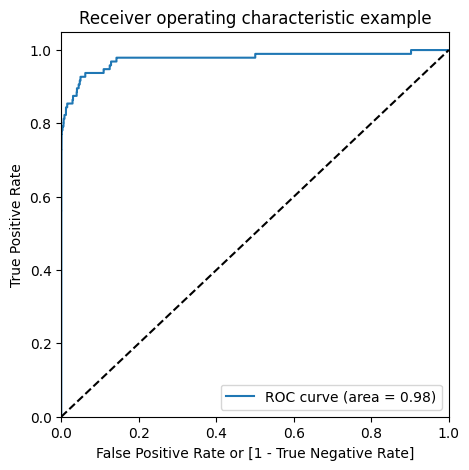

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 1.0, Sensitivity = 1.0, Specificity = 1.0, ROC-AUC = 1.0.

**Test set**

Accuracy = 0.96 Sensitivity = 1.0 Specificity = 1.0 ROC-AUC = 0.97.

# **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.015620      0.004701         0.009131        0.002192   
1       0.014210      0.000489         0.007823        0.000243   
2       0.010766      0.000838         0.008257        0.002147   
3       0.012563      0.001708         0.007679        0.001114   
4       0.013633      0.001546         0.006448        0.000314   
5       0.012097      0.000207         0.006673        0.000562   
6       0.012801      0.001799         0.009096        0.001762   
7       0.012214      0.001044         0.007406        0.000193   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.940944   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.940255   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.940743   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.940054   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.943268   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.940255   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.940054   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.940284   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.955406           0.967114         0.954488        0.010704   
1           0.958419           0.960342         0.953005        0.009050   
2           0.945305           0.952910         0.946319        0.005019   
3           0.945334           0.952336         0.945908        0.005030   
4           0.952996           0.962580         0.952948        0.007884   
5           0.955923           0.967114         0.954431        0.011016   
6           0.945449           0.953053         0.946185        0.005332   
7           0.945363           0.954345         0.946664        0.005814   

   rank_test_score  
0                1  
1                3  
2                6  
3                8  
4                4  
5                2  
6                7  
7                5

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.954488062442608
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

# **Prediction on the train set**

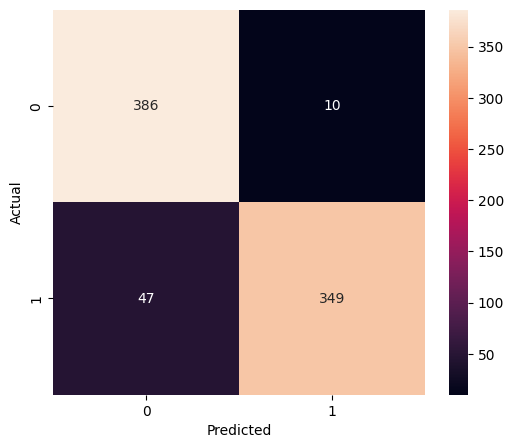

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.928030303030303
Sensitivity:- 0.8813131313131313
Specificity:- 0.9747474747474747


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       396
           1       0.97      0.88      0.92       396

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9781878124681155

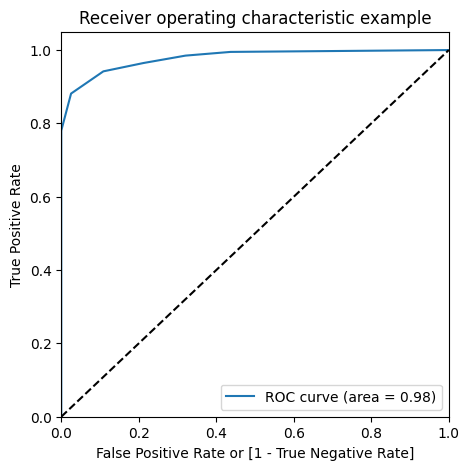

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

# **Prediction on the test set**

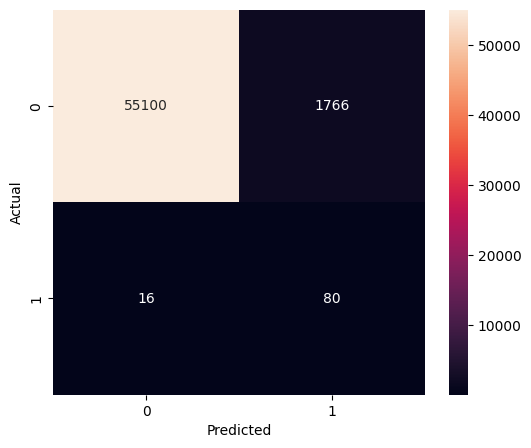

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9687159860959939
Sensitivity:- 0.8333333333333334
Specificity:- 0.9689445362782683


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9609164343954794

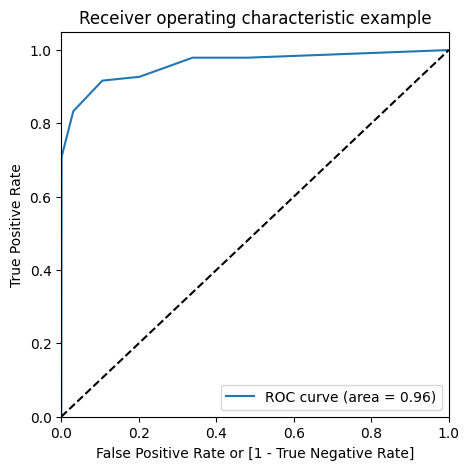

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.92, Sensitivity = 0.88, Specificity = 0.97, ROC-AUC = 0.98.

**Test set**

Accuracy = 0.96, Sensitivity = 0.83, Specificity = 0.96, ROC-AUC = 0.96.

# **Oversampling**

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


# **Logistic Regression**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       3.697118      1.404179         0.115098        0.050790    0.01   
1       2.849522      0.810035         0.085579        0.027787     0.1   
2       2.663879      0.785562         0.094452        0.038714       1   
3       2.667065      0.833210         0.063361        0.002479      10   
4       2.687321      0.792767         0.081061        0.024719     100   
5       2.822995      0.742992         0.109102        0.092509    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.988652           0.988332           0.988517   
1   {'C': 0.1}           0.988662           0.988353           0.988526   
2     {'C': 1}           0.988663           0.988354           0.988527   
3    {'C': 10}           0.988664           0.988354           0.988526   
4   {'C': 100}           0.988664           0.988354           0.988526   
5  {'C': 1000}           0.988664           0.988354           0.988526   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.988215           0.988382         0.988420        0.000152   
1           0.988220           0.988385         0.988429        0.000152   
2           0.988219           0.988386         0.988430        0.000152   
3           0.988218           0.988387         0.988430        0.000153   
4           0.988218           0.988387         0.988430        0.000153   
5           0.988218           0.988386         0.988430        0.000153   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.988413            0.988459   
1                5            0.988427            0.988468   
2                1            0.988427            0.988468   
3                2            0.988426            0.988469   
4                3            0.988426            0.988469   
5                4            0.988426            0.988469   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.988409            0.988546            0.988371   
1            0.988411            0.988553            0.988378   
2            0.988412            0.988552            0.988379   
3            0.988412            0.988553            0.988379   
4            0.988412            0.988553            0.988379   
5            0.988412            0.988553            0.988379   

   mean_train_score  std_train_score  
0          0.988440          0.00006  
1          0.988447          0.00006  
2          0.988448          0.00006  
3          0.988448          0.00006  
4          0.988448          0.00006  
5          0.988448          0.00006

<Figure size 1600x600 with 0 Axes>

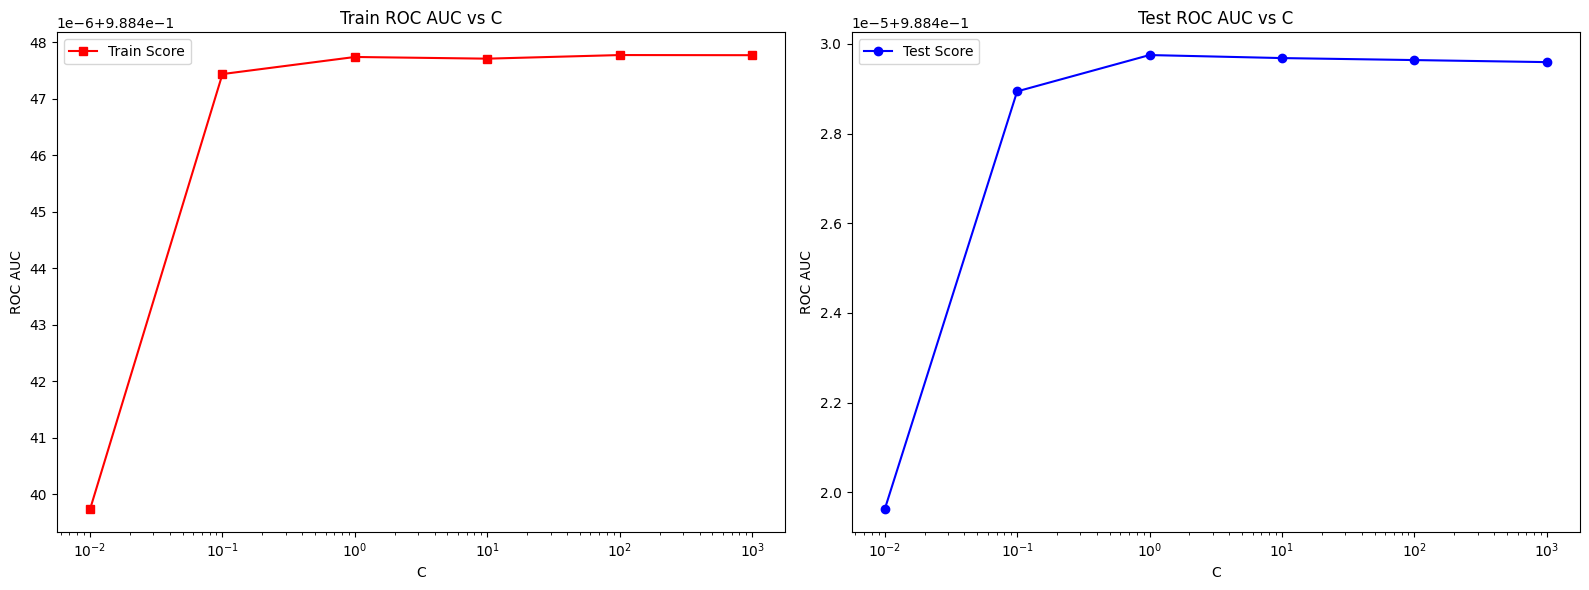

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(16, 6))

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# First subplot for train scores
ax1.plot(cv_results['param_C'], cv_results['mean_train_score'], label='Train Score', color='red', marker='s')
ax1.set_xlabel('C')
ax1.set_ylabel('ROC AUC')
ax1.set_xscale('log')
ax1.set_title('Train ROC AUC vs C')
ax1.legend()

# Second subplot for test scores
ax2.plot(cv_results['param_C'], cv_results['mean_test_score'], label='Test Score', color='blue', marker='o')
ax2.set_xlabel('C')
ax2.set_ylabel('ROC AUC')
ax2.set_xscale('log')
ax2.set_title('Test ROC AUC vs C')
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9884297498712747 at C = 1


# **Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

# **Prediction on the train set**

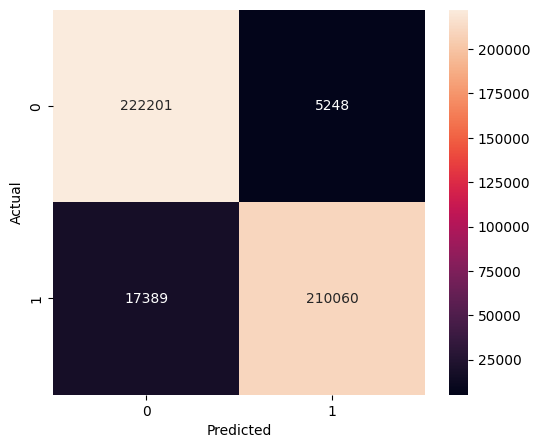

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9502371960307585
Sensitivity:- 0.923547696406667
Specificity:- 0.9769266956548501
F1-Score:- 0.9488726321661769


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9884432820368302

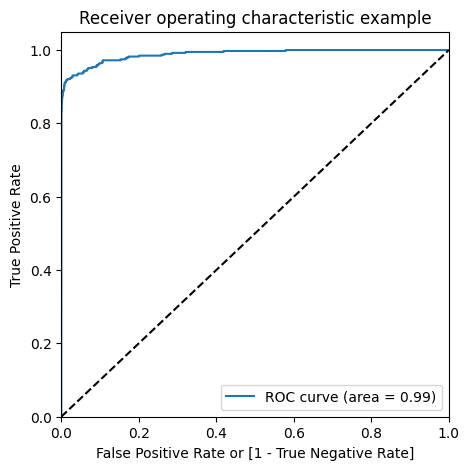

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

# **Prediction on the test set**

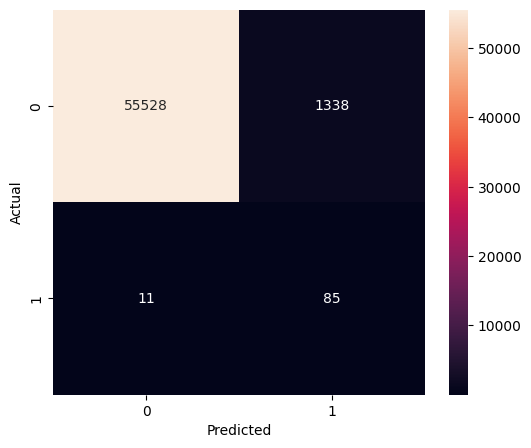

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.97631754503002
Sensitivity:- 0.8854166666666666
Specificity:- 0.9764710020047128


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9712364740501062

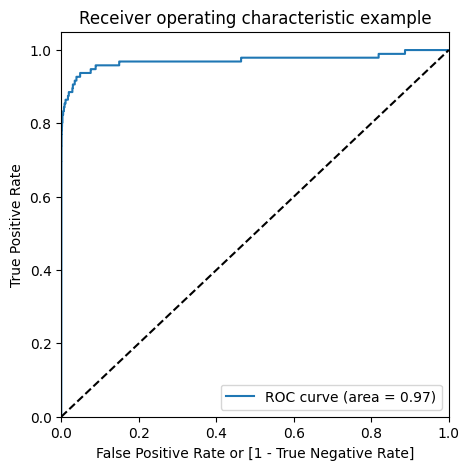

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.94, Sensitivity = 0.92, Specificity = 0.97, ROC-AUC = 0.99.


**Test set**

Accuracy = 0.97 Sensitivity = 0.88 Specificity = 0.97 ROC-AUC = 0.97

# **XGBoost**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       8.142801      1.281943         0.274373        0.010797   
1       8.512257      1.410166         0.265347        0.006825   
2       8.856935      1.509335         0.275143        0.013303   
3       8.801225      1.474518         0.267749        0.002671   
4       8.864041      1.263524         0.263906        0.007603   
5       9.056575      0.781555         0.323983        0.076220   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999903   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999894   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999907   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999986   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999995   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999986   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999924           0.999897         0.999908    1.150806e-05   
1           0.999912           0.999899         0.999902    7.712831e-06   
2           0.999915           0.999895         0.999906    7.986241e-06   
3           0.999986           0.999985         0.999985    7.404174e-07   
4           0.999989           0.999976         0.999987    7.796569e-06   
5           0.999984           0.999978         0.999982    3.455351e-06   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999920            0.999921   
1                6            0.999914            0.999910   
2                5            0.999919            0.999912   
3                2            0.999994            0.999996   
4                1            0.999999            0.999996   
5                3            0.999998            0.999995   

   split2_train_score  mean_train_score  std_train_score  
0            0.999915          0.999919         0.000002  
1            0.999910          0.999911         0.000002  
2            0.999914          0.999915         0.000003  
3            0.999998          0.999996         0.000002  
4            1.000000          0.999998         0.000002  
5            1.000000          0.999998         0.000002

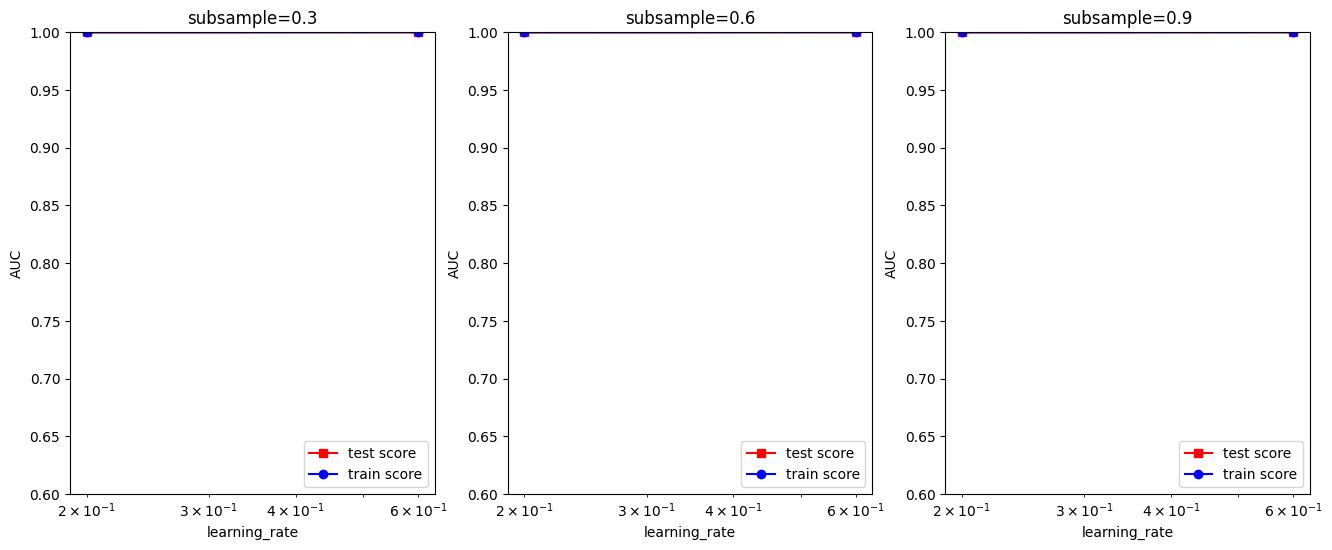

In [ ]:
#plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"], color = 'red',  marker='s')
    plt.plot(df["param_learning_rate"], df["mean_train_score"], color = 'blue', marker = 'o')
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')

**Model with optimal hyperparameters**

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

# **Prediction on the train set**

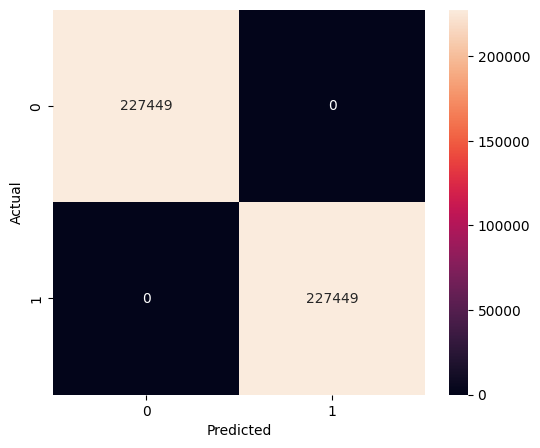

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 1.0
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

1.0

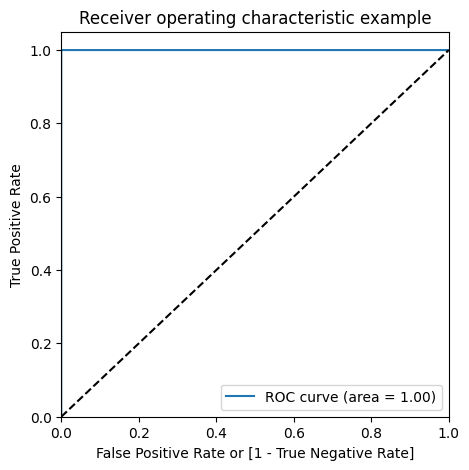

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

# **Prediction on the test set**

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

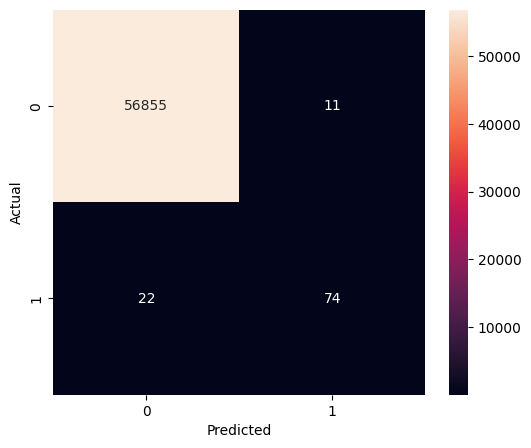

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.999420666409185
Sensitivity:- 0.7708333333333334
Specificity:- 0.9998065627967503


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.87      0.77      0.82        96

    accuracy                           1.00     56962
   macro avg       0.94      0.89      0.91     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9688828964876494

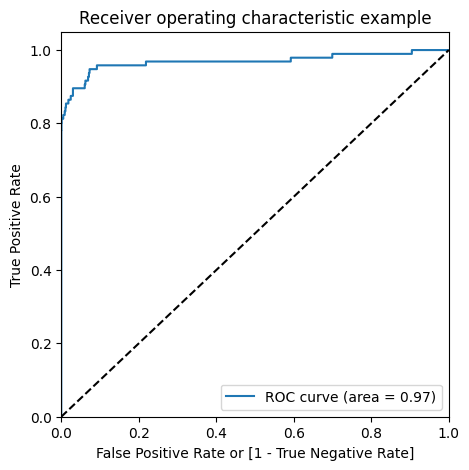

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 1.0, Sensitivity = 1.0, Specificity = 1.0, ROC-AUC = 1.0.

**Test set**

Accuracy = 0.99, Sensitivity = 0.77, Specificity = 0.99, ROC-AUC = 0.97.

# **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.420711      1.483237         0.073267        0.006747   
1       6.660690      0.605752         0.073519        0.007554   
2       6.095160      0.441601         0.082288        0.019296   
3       6.267673      0.566339         0.081384        0.016658   
4      10.183136      0.698052         0.081141        0.020886   
5      10.379831      0.408169         0.063719        0.001528   
6       9.666237      0.839863         0.070777        0.011112   
7       9.694802      0.199139         0.083906        0.012637   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.983559   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.983559   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.983548   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.983548   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999566   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.999565   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999600   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.999584   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.990647           0.991314         0.988507        0.003509   
1           0.990647           0.991314         0.988507        0.003509   
2           0.990566           0.991230         0.988448        0.003475   
3           0.990566           0.991235         0.988450        0.003476   
4           0.999685           0.999595         0.999615        0.000051   
5           0.999648           0.999552         0.999588        0.000042   
6           0.999621           0.999596         0.999606        0.000011   
7           0.999647           0.999583         0.999605        0.000030   

   rank_test_score  
0                5  
1                5  
2                8  
3                7  
4                1  
5                4  
6                2  
7                3

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996151618439658
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

# **Prediction on the train set**

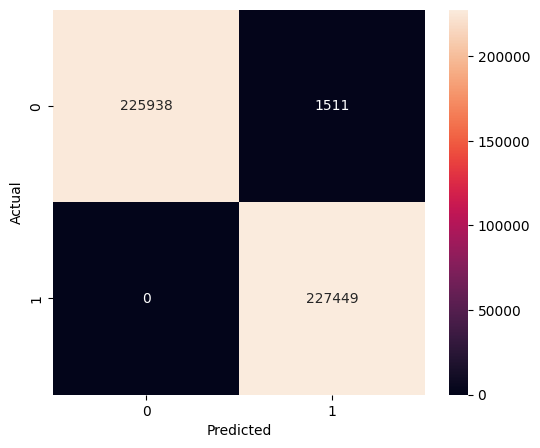

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966783762513794
Sensitivity:- 1.0
Specificity:- 0.9933567525027589


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.999771040977687

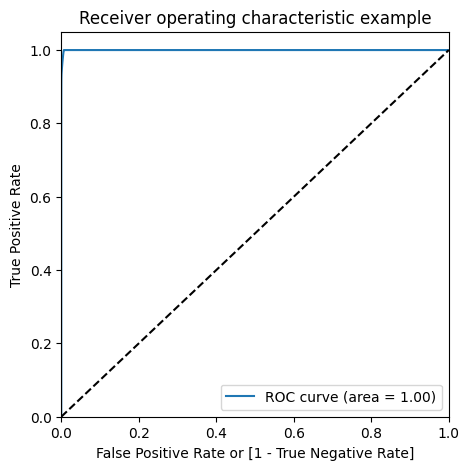

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

# **Prediction on the test set**

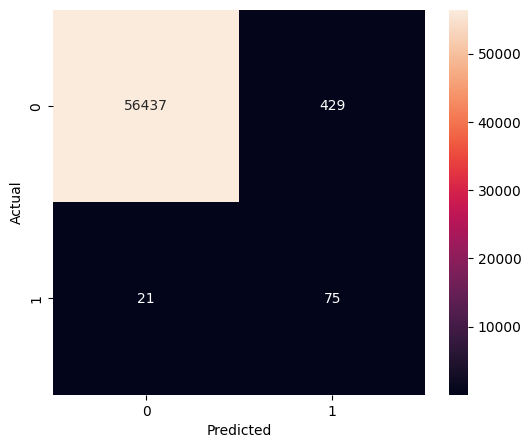

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9920999964888874
Sensitivity:- 0.78125
Specificity:- 0.99245594907326


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.15      0.78      0.25        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8896568064983178

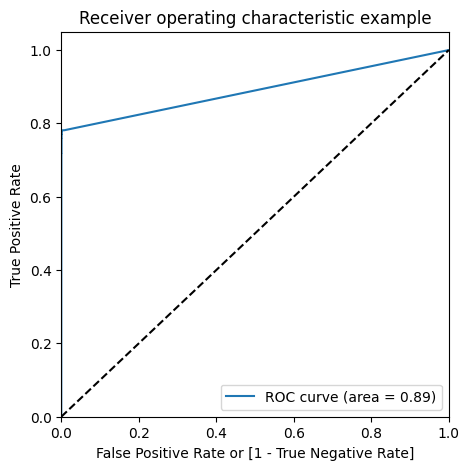

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.99 Sensitivity = 1.0 Specificity = 0.99 ROC-AUC = 1.0

**Test set**

Accuracy = 0.99 Sensitivity = 0.78 Specificity = 0.99 ROC-AUC = 0.89

# **SMOTE (Synthetic Minority Oversampling Technique)**

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
sm = SMOTE(random_state=27)

# Fitting SMOTE to the train set
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


# **Logistic Regression**

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       3.315662      1.004579         0.127414        0.052937    0.01   
1       3.594759      0.970691         0.103800        0.044390     0.1   
2       2.652361      0.694075         0.082343        0.029405       1   
3       2.409768      0.736823         0.079640        0.032079      10   
4       2.494902      0.419721         0.081667        0.028979     100   
5       2.695549      0.962911         0.076209        0.020699    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.989805           0.989796           0.989484   
1   {'C': 0.1}           0.989834           0.989807           0.989488   
2     {'C': 1}           0.989836           0.989807           0.989486   
3    {'C': 10}           0.989836           0.989807           0.989486   
4   {'C': 100}           0.989836           0.989807           0.989486   
5  {'C': 1000}           0.989836           0.989807           0.989486   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.989631           0.989910         0.989725        0.000150   
1           0.989632           0.989942         0.989741        0.000161   
2           0.989630           0.989944         0.989741        0.000162   
3           0.989630           0.989945         0.989741        0.000163   
4           0.989630           0.989945         0.989741        0.000163   
5           0.989630           0.989945         0.989741        0.000163   

   rank_test_score  split0_train_score  split1_train_score  \
0                6            0.989758            0.989666   
1                1            0.989780            0.989686   
2                2            0.989781            0.989687   
3                5            0.989781            0.989687   
4                3            0.989781            0.989687   
5                4            0.989781            0.989687   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.989760            0.989841            0.989682   
1            0.989772            0.989853            0.989700   
2            0.989772            0.989852            0.989701   
3            0.989772            0.989852            0.989701   
4            0.989772            0.989852            0.989701   
5            0.989772            0.989852            0.989701   

   mean_train_score  std_train_score  
0          0.989741         0.000063  
1          0.989758         0.000060  
2          0.989758         0.000060  
3          0.989758         0.000060  
4          0.989758         0.000060  
5          0.989758         0.000060

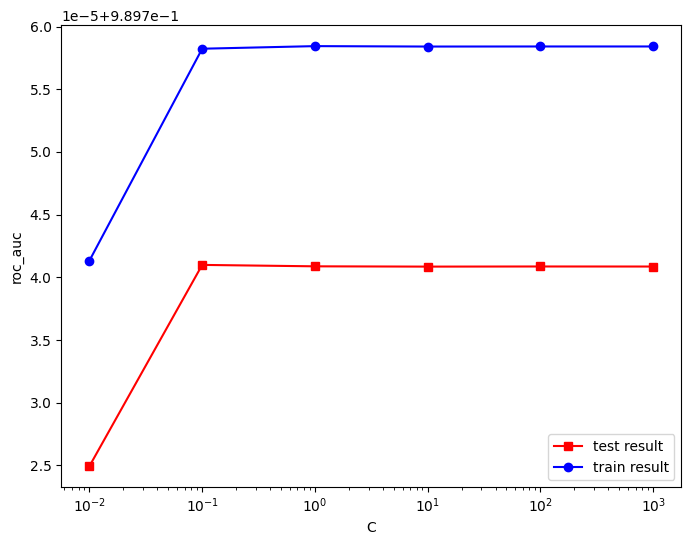

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'], color='red', marker='s')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'], color='blue', marker='o')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='lower right')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


# **Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

# **Prediction on the train set**

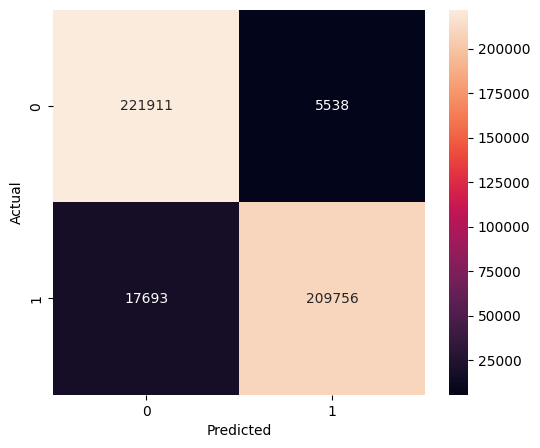

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



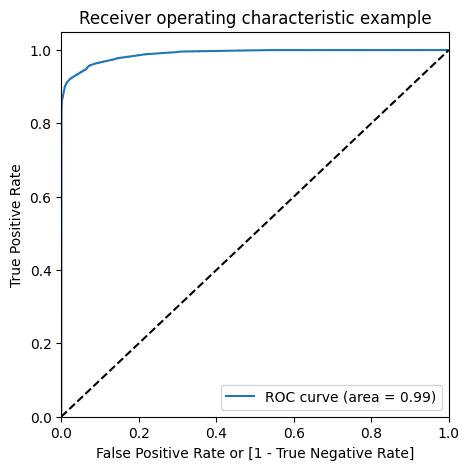

In [ ]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

# **Prediction on the test set**

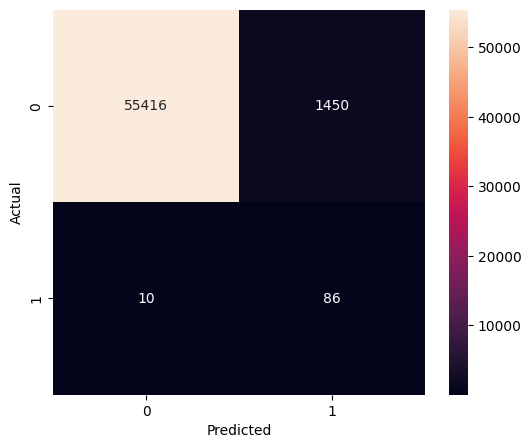

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



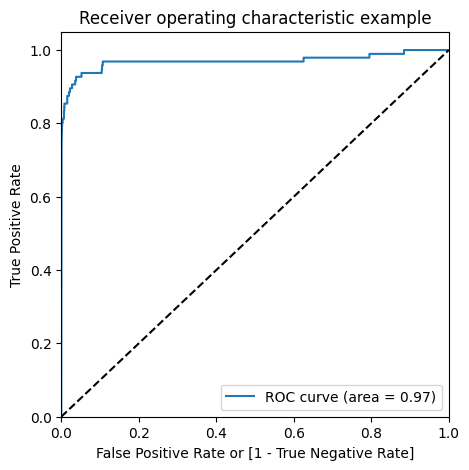

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.94, Sensitivity = 0.92, Specificity = 0.97, ROC-AUC = 0.99.

**Test set**

Accuracy = 0.97, Sensitivity = 0.89, Specificity = 0.97, ROC-AUC = 0.97.

# **XGBoost**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       9.244180      1.690427         0.284985        0.014969   
1       8.907969      1.433027         0.278959        0.007069   
2       8.464344      1.217409         0.275611        0.011114   
3       9.255890      1.611516         0.281753        0.010578   
4       8.847825      1.139285         0.325746        0.070913   
5       8.268561      1.238646         0.278728        0.011810   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.999675   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.999648   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.999657   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.999932   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.999964   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.999963   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.999729           0.999679         0.999694        0.000024   
1           0.999719           0.999656         0.999674        0.000032   
2           0.999730           0.999654         0.999680        0.000035   
3           0.999958           0.999948         0.999946        0.000011   
4           0.999953           0.999957         0.999958        0.000005   
5           0.999949           0.999958         0.999957        0.000006   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999725            0.999712   
1                6            0.999702            0.999709   
2                5            0.999712            0.999714   
3                3            0.999967            0.999968   
4                1            0.999977            0.999979   
5                2            0.999977            0.999976   

   split2_train_score  mean_train_score  std_train_score  
0            0.999720          0.999719         0.000005  
1            0.999721          0.999711         0.000008  
2            0.999703          0.999710         0.000005  
3            0.999977          0.999971         0.000005  
4            0.999979          0.999978         0.000001  
5            0.999981          0.999978         0.000002

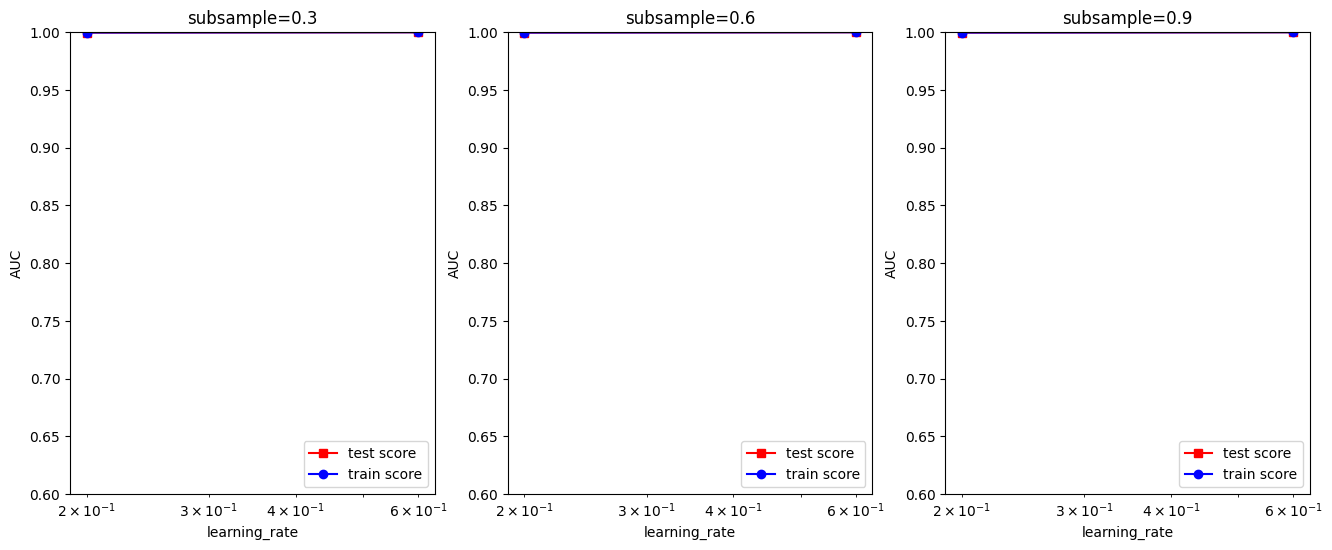

In [ ]:
# plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"], color = 'red', marker='s')
    plt.plot(df["param_learning_rate"], df["mean_train_score"], color = 'blue', marker='o')
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')

**Model with optimal hyperparameters**

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9}, ...)

# **Prediction on the train set**

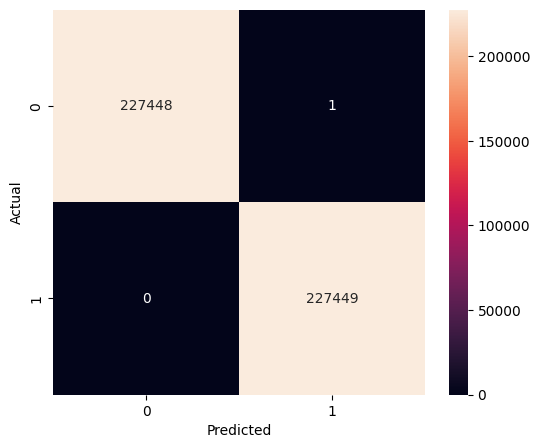

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999978017049976
Sensitivity:- 1.0
Specificity:- 0.9999956034099952


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9999999890785479

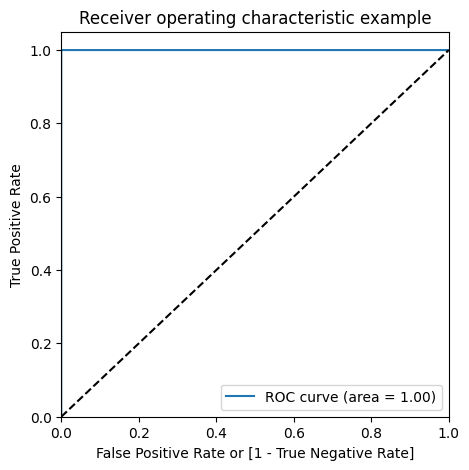

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

# **Prediction on the test set**

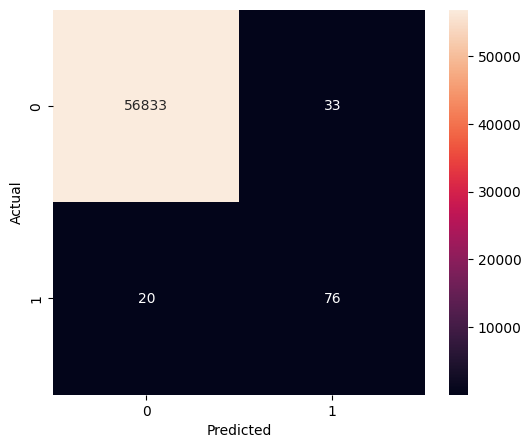

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9990695551420246
Sensitivity:- 0.7916666666666666
Specificity:- 0.9994196883902507


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.70      0.79      0.74        96

    accuracy                           1.00     56962
   macro avg       0.85      0.90      0.87     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9553290117703608

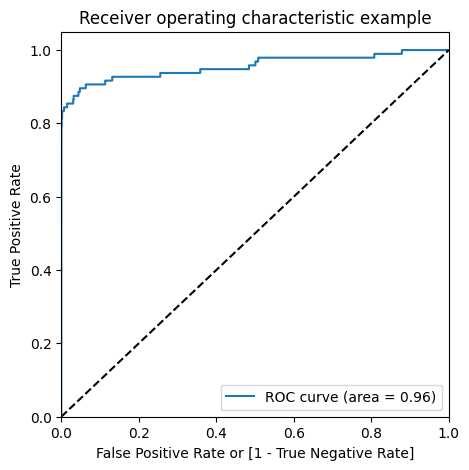

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.99 Sensitivity = 1.0 Specificity = 0.99 ROC-AUC = 1.0

**Test set**

Accuracy = 0.99 Sensitivity = 0.79 Specificity = 0.99 ROC-AUC = 0.96



# **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.554913      0.295331         0.075287        0.007896   
1      10.205361      0.313233         0.079469        0.015093   
2      10.528410      0.209576         0.097764        0.020567   
3      13.024661      2.893245         0.081956        0.006907   
4      19.492499      0.815951         0.083958        0.007110   
5      18.946910      0.394552         0.084065        0.005298   
6      19.466978      0.561498         0.091553        0.013515   
7      19.391657      0.539680         0.098399        0.029460   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.986127   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986072   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.986057   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998141   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.998101   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998093   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.998129   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.985688           0.984839         0.985551        0.000535   
1           0.985690           0.984839         0.985552        0.000535   
2           0.985640           0.984777         0.985496        0.000538   
3           0.985642           0.984772         0.985490        0.000535   
4           0.998144           0.997947         0.998078        0.000092   
5           0.998133           0.997983         0.998072        0.000064   
6           0.998061           0.997926         0.998027        0.000073   
7           0.998088           0.997905         0.998041        0.000097   

   rank_test_score  
0                6  
1                5  
2                7  
3                8  
4                1  
5                2  
6                4  
7                3

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980776004944255
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

# **Prediction on the train set**

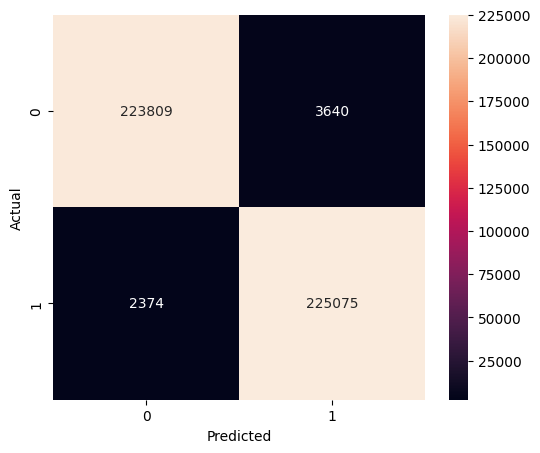

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



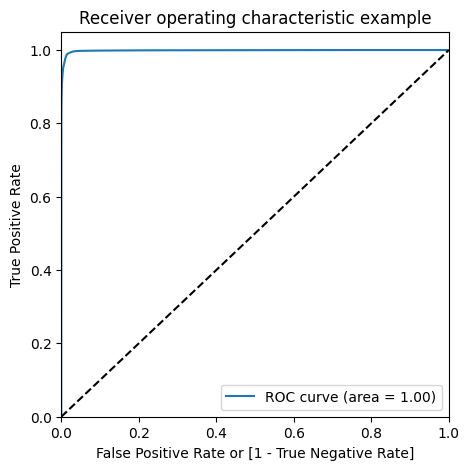

In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

# **Prediction on the test set**

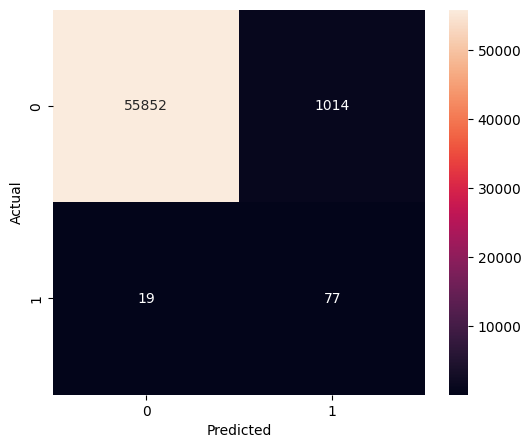

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

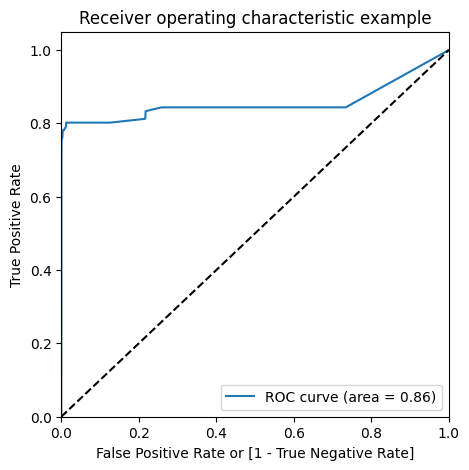

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.98 Sensitivity = 0.98 Specificity = 0.98 ROC-AUC = 1.0

**Test set**

Accuracy = 0.98 Sensitivity = 0.80 Specificity = 0.98 ROC-AUC = 0.86

# **AdaSyn (Adaptive Synthetic Sampling)**

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


# **Logistic Regression**

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       2.124793      0.593949         0.146006        0.056409    0.01   
1       2.100404      0.089416         0.155588        0.029568     0.1   
2       2.396858      0.290043         0.115607        0.008993       1   
3       1.993237      0.139282         0.121301        0.022972      10   
4       2.239677      0.561415         0.140111        0.038027     100   
5       2.182257      0.173853         0.158950        0.035355    1000   

        params  split0_test_score  split1_test_score  split2_test_score  \
0  {'C': 0.01}           0.963472           0.962327           0.963273   
1   {'C': 0.1}           0.963578           0.962435           0.963370   
2     {'C': 1}           0.963585           0.962442           0.963376   
3    {'C': 10}           0.963585           0.962443           0.963377   
4   {'C': 100}           0.963585           0.962443           0.963377   
5  {'C': 1000}           0.963585           0.962443           0.963377   

   mean_test_score  std_test_score  rank_test_score  split0_train_score  \
0         0.963024        0.000499                6            0.962770   
1         0.963128        0.000497                5            0.962881   
2         0.963134        0.000497                4            0.962890   
3         0.963135        0.000496                3            0.962891   
4         0.963135        0.000496                2            0.962891   
5         0.963135        0.000496                1            0.962891   

   split1_train_score  split2_train_score  mean_train_score  std_train_score  
0            0.963211            0.963172          0.963051         0.000199  
1            0.963305            0.963272          0.963153         0.000192  
2            0.963312            0.963278          0.963160         0.000191  
3            0.963312            0.963279          0.963161         0.000191  
4            0.963312            0.963279          0.963161         0.000191  
5            0.963312            0.963279          0.963161         0.000191

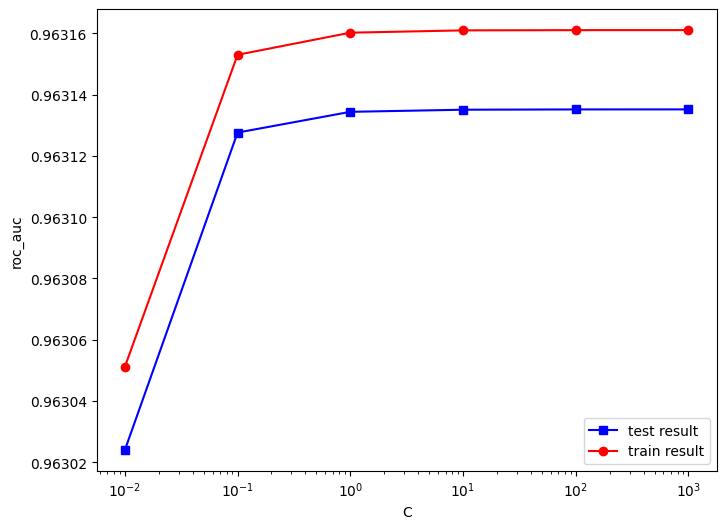

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'] , color = 'blue', marker='s')
plt.plot(cv_results['param_C'], cv_results['mean_train_score'] , color = 'red', marker='o')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='lower right')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631351481659101 at C = 1000


# **Logistic regression with optimal C**

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

# **Prediction on the train set**

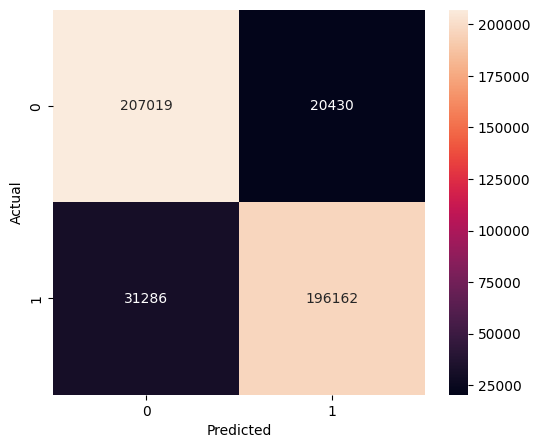

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9631610161228312

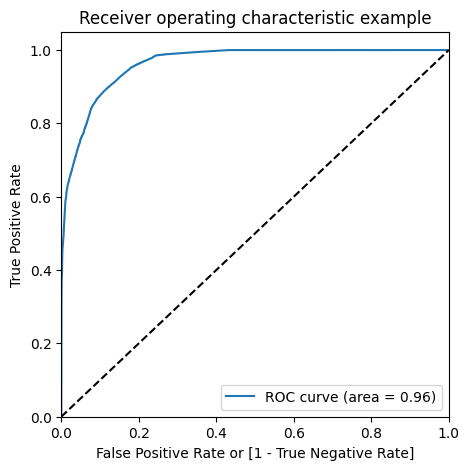

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

# **Prediction on the test set**

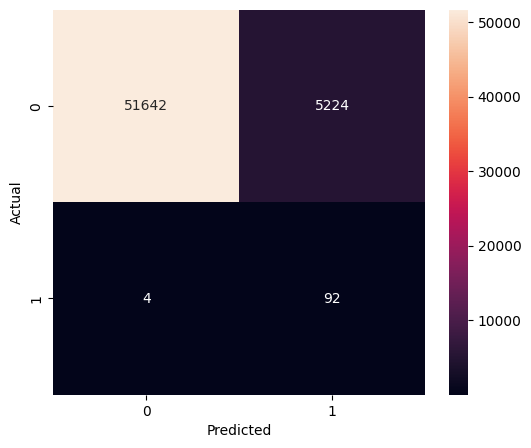

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

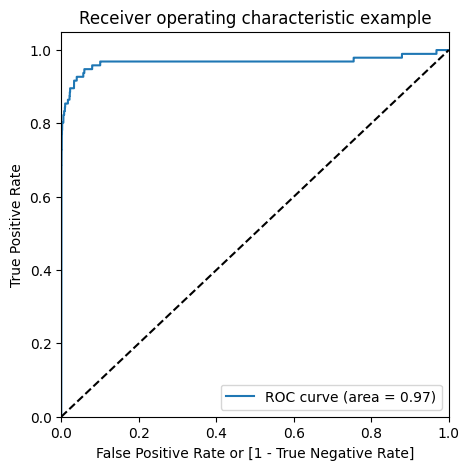

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.88, Sensitivity = 0.86, Specificity = 0.91, ROC-AUC = 0.96.

**Test set**

Accuracy = 0.90, Sensitivity = 0.95, Specificity = 0.90, ROC-AUC = 0.97.

# **Decision Tree**

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0      10.643249      0.215740         0.089465        0.012137   
1      10.755510      0.589378         0.091468        0.019998   
2      10.951324      0.117311         0.092180        0.019505   
3      10.691847      0.683870         0.072537        0.000093   
4      19.257849      0.738913         0.099760        0.018225   
5      18.350486      0.535530         0.096525        0.023756   
6      18.144654      0.518767         0.082888        0.006653   
7      17.918792      0.421879         0.090423        0.014054   

  param_max_depth param_min_samples_leaf param_min_samples_split  \
0               5                     50                      50   
1               5                     50                     100   
2               5                    100                      50   
3               5                    100                     100   
4              10                     50                      50   
5              10                     50                     100   
6              10                    100                      50   
7              10                    100                     100   

                                              params  split0_test_score  \
0  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
1  {'max_depth': 5, 'min_samples_leaf': 50, 'min_...           0.902958   
2  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
3  {'max_depth': 5, 'min_samples_leaf': 100, 'min...           0.902958   
4  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935380   
5  {'max_depth': 10, 'min_samples_leaf': 50, 'min...           0.935288   
6  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.937567   
7  {'max_depth': 10, 'min_samples_leaf': 100, 'mi...           0.936641   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.920355           0.909339         0.910884        0.007186   
1           0.920355           0.909339         0.910884        0.007186   
2           0.920317           0.914013         0.912429        0.007174   
3           0.920310           0.911441         0.911570        0.007085   
4           0.946339           0.938392         0.940037        0.004623   
5           0.947028           0.936861         0.939726        0.005203   
6           0.946647           0.942483         0.942232        0.003711   
7           0.946228           0.943223         0.942031        0.004004   

   rank_test_score  
0                8  
1                7  
2                5  
3                6  
4                3  
5                4  
6                1  
7                2

In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9422321416446385
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

# **Prediction on the train set**

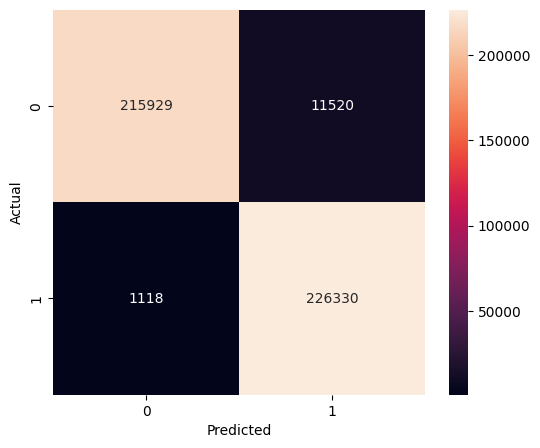

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

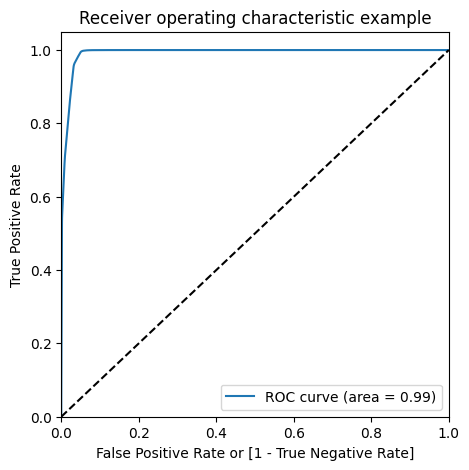

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

# **Prediction on the test set**

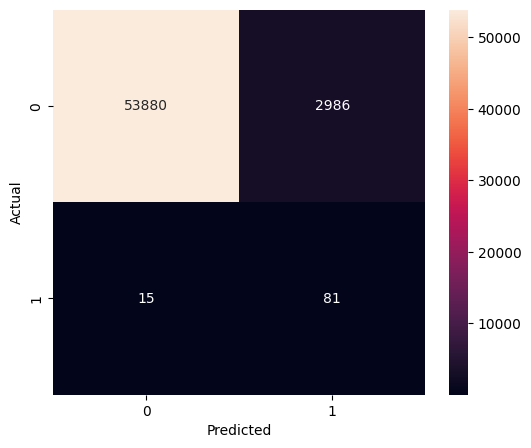

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

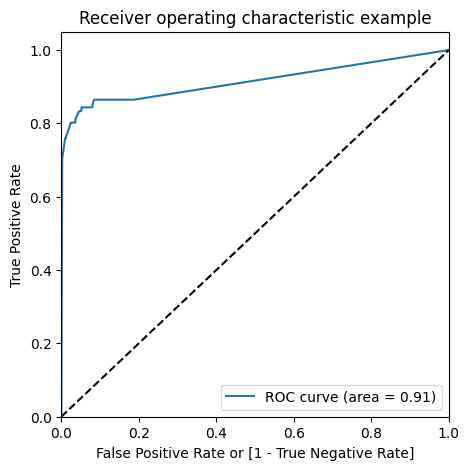

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

# **Model summary**

**Train set**

Accuracy = 0.97, Sensitivity = 0.99, Specificity = 0.94, ROC-AUC = 0.99.

**Test set**

Accuracy = 0.94, Sensitivity = 0.84, Specificity = 0.94, ROC-AUC = 0.91.

# **XGBoost**

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=200,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       7.700451      0.949918         0.324117        0.080139   
1       8.420318      1.450943         0.272532        0.009661   
2       7.789218      0.838990         0.337854        0.077430   
3       7.618126      1.349607         0.269616        0.009091   
4       8.493765      1.362517         0.274971        0.015676   
5       7.999602      1.121593         0.372346        0.124051   

  param_learning_rate param_subsample  \
0                 0.2             0.3   
1                 0.2             0.6   
2                 0.2             0.9   
3                 0.6             0.3   
4                 0.6             0.6   
5                 0.6             0.9   

                                     params  split0_test_score  \
0  {'learning_rate': 0.2, 'subsample': 0.3}           0.975484   
1  {'learning_rate': 0.2, 'subsample': 0.6}           0.978568   
2  {'learning_rate': 0.2, 'subsample': 0.9}           0.975494   
3  {'learning_rate': 0.6, 'subsample': 0.3}           0.970728   
4  {'learning_rate': 0.6, 'subsample': 0.6}           0.975766   
5  {'learning_rate': 0.6, 'subsample': 0.9}           0.978028   

   split1_test_score  split2_test_score  mean_test_score  std_test_score  \
0           0.996111           0.994796         0.988797        0.009429   
1           0.996275           0.994438         0.989760        0.007949   
2           0.995795           0.995089         0.988793        0.009408   
3           0.996584           0.997243         0.988185        0.012347   
4           0.996595           0.996559         0.989640        0.009810   
5           0.995906           0.997311         0.990415        0.008778   

   rank_test_score  split0_train_score  split1_train_score  \
0                4            0.999302            0.998994   
1                2            0.999290            0.998966   
2                5            0.999231            0.998957   
3                6            0.999914            0.999928   
4                3            0.999938            0.999926   
5                1            0.999930            0.999933   

   split2_train_score  mean_train_score  std_train_score  
0            0.999229          0.999175         0.000132  
1            0.999181          0.999146         0.000135  
2            0.999148          0.999112         0.000115  
3            0.999941          0.999928         0.000011  
4            0.999940          0.999934         0.000006  
5            0.999952          0.999938         0.000010

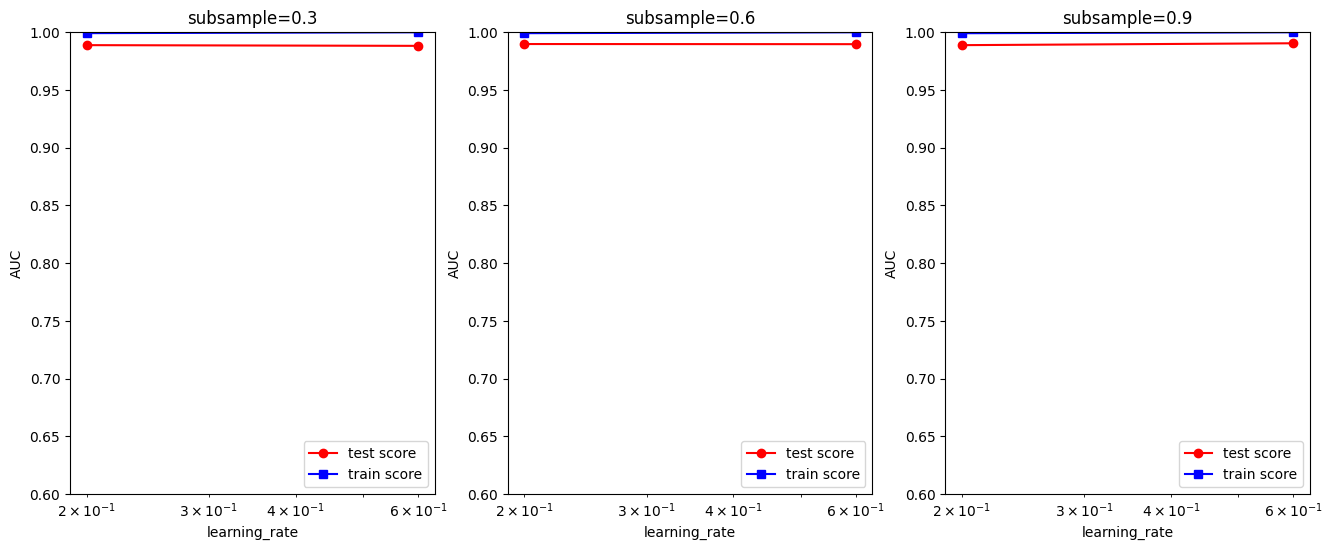

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"], color = 'red', marker='o')
    plt.plot(df["param_learning_rate"], df["mean_train_score"], color = 'blue', marker='s')

    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='lower right')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3}, ...)

# **Prediction on the train set**

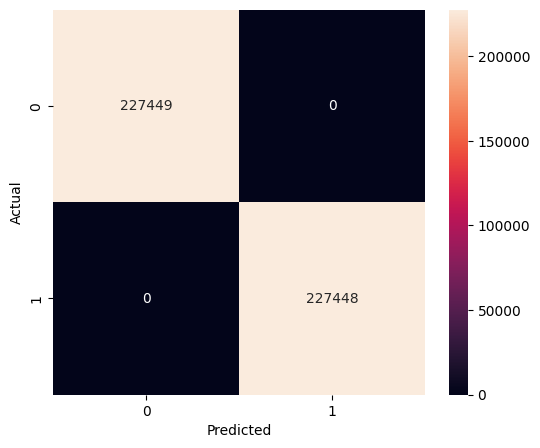

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9999956034003302
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227448

    accuracy                           1.00    454897
   macro avg       1.00      1.00      1.00    454897
weighted avg       1.00      1.00      1.00    454897



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

1.0

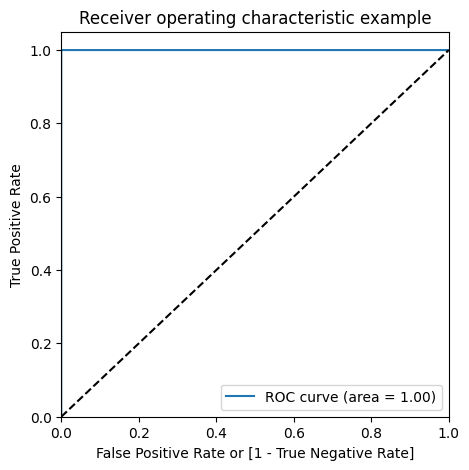

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

# **Prediction on the test set**

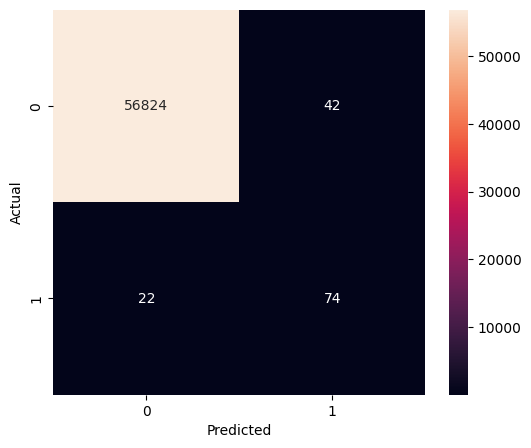

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(confusion, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9988764439450862
Sensitivity:- 0.7708333333333334
Specificity:- 0.9992614215875919


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.64      0.77      0.70        96

    accuracy                           1.00     56962
   macro avg       0.82      0.89      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9531543086671591

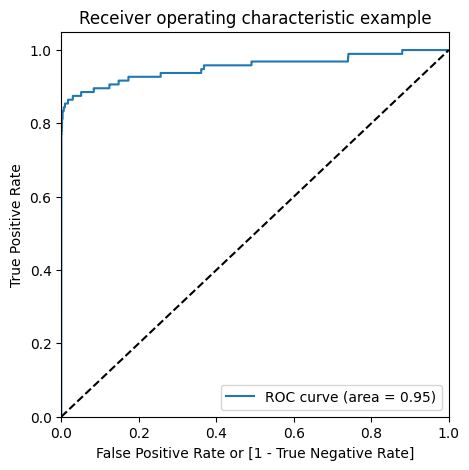

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

**Model summary**

**Train set**

Accuracy = 0.99, Sensitivity = 1.0, Specificity = 1.0, ROC-AUC = 1.0.

**Test set**

Accuracy = 0.99, Sensitivity = 0.77, Specificity = 0.99, ROC-AUC = 0.95.

**Choosing best model on the balanced data**

We balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, and Decision Tree.

# **Print the FPR,TPR & select the best threshold from the roc curve for the best model**

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539729422445
Threshold= 0.5311563631020336


# **Cost-Benefit Analysis**

We have evaluated several models using both balanced and imbalanced data, and most have shown similar performance in terms of ROC score, Precision, and Recall.

However, selecting the best model involves more than just performance metrics. Here are key considerations.

**Infrastructure and Computational Resources**:

* Complex models like Random Forest, SVM, and XGBoost require significantcomputational resources. The cost of deploying these models includes building and maintaining the necessary infrastructure, which can be expensive.
* Simpler models such as Logistic Regression require fewer computational resources, resulting in lower deployment costs.

**Monetary Impact of ROC Score Changes:**

* It is essential to assess the financial implications of small changes in the ROC score. If a slight improvement in the ROC score leads to substantial monetary gains or prevents significant losses for the bank, investing in a more complex model may be justified despite the higher costs.
* Conversely, if the financial impact of ROC score changes is minimal, opting for a simpler, cost-effective model would be more prudent.

In conclusion, our decision should balance the computational costs with the potential financial benefits. If the financial impact is significant, the higher cost of deploying a complex model could be warranted. If the impact is minimal, a simpler model would be more cost-effective.

# **Summary for the Business**

Our analysis has focused on optimizing the detection of fraudulent transactions, tailored to different banking contexts:

**Banks with Smaller Average Transaction Value**:

* Priority on High Precision: It's crucial to label only relevant transactions as fraudulent to avoid unnecessary burdens. For flagged transactions, we can incorporate a human verification step, such as contacting the customer. Low precision increases the workload for human verification, making it inefficient.

**Banks with Larger Transaction Value**:

* Priority on High Recall: It's vital to detect as many fraudulent transactions as possible to prevent significant financial losses. Missing a high-value fraudulent transaction due to low recall can be extremely costly.

**Model Selection**:

* After testing various models, we found that using a balanced dataset with the SMOTE technique, the simplest Logistic Regression model performs well. It achieves a good ROC score and high recall, especially beneficial for detecting actual fraudulent transactions in high-value scenarios.
* Logistic Regression is also easier to interpret and explain, facilitating better understanding and decision-making within the business.


Thus, we recommend using the Logistic Regression model for its balance of performance, simplicity, and interpretability.

